In [37]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as pd

# Initialize
1. File path where the input data files reside.
2. Dictionary of major airports consisting of IATA airport codes and airport city names

In [38]:
# Assign the directory of the input data files to a variable
input_data_path = 'Resources/'

# Since we are only interested in data related to major airports, create a dictionary of major
# airports with the states they are located in. This is useful for later analysis by state.
major_airports = {'ATL': 'GA',
                  'AUS': 'TX',
                  'BNA': 'TN',
                  'BOS': 'MA',
                  'BWI': 'MD',
                  'CLT': 'NC',
                  'DCA': 'VA',
                  'DEN': 'CO',
                  'DFW': 'TX',
                  'DTW': 'MI',
                  'EWR': 'NJ',
                  'FLL': 'FL',
                  'IAD': 'VA',
                  'IAH': 'TX',
                  'JFK': 'NY',
                  'LAS': 'NV',
                  'LAX': 'CA',
                  'LGA': 'NY',
                  'MCO': 'FL',
                  'MDW': 'IL',
                  'MIA': 'FL',
                  'MSP': 'MN',
                  'ORD': 'IL',
                  'PHL': 'PA',
                  'PHX': 'AZ',
                  'SAN': 'CA',
                  'SEA': 'WA',
                  'SFO': 'CA',
                  'SLC': 'UT',
                  'TPA': 'FL'}


# Step 1: Import Data
There are three sets of data:
1. Flight data  
   Flight data is retrieved from the `On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv` files in the `Resources/` folder.
   There is a file for each month between January 2018 and December 2023. Each file contains a list of all US domestic commercial flights in that month.
   We will use these files to retrieve the number of flights, the flight delays and the cancelled flights.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr as accessed between 4/8/2024 and 4/17/2024.  
   A file for each year and month between January 2018 and December 2023 was downloaded separately.
2. Number of passengers  
   That data is retrieved from the `*_Passengers_*.csv` files. There is a file for each of the major US airports. Each file contains the number of passengers
   that enplaned from that airport each month starting in October of 2002 until December of 2023. We will use these files to retrieve passenger volumes.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   https://www.transtats.bts.gov/Data_Elements.aspx?Data=2 as accessed between 4/8/2024 and 4/17/2024.
   A file for each majior US airport was downloaded separately.
3. Average Airfares  
   The quarterly average airfare is retrieved from the `AverageFare_Q*.csv` files. There is a file for each quarter from Q1 of 2018 to Q3 of 2023. It contains
   the average airfare for each US airport.  
   **Note:** These files were not available in `.csv` format from the source. They were only available in a "pseudo' Excel format that was not recognized by
   the Pandas `read_excel` function. We therefore converted them to `.csv` files manually.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   (https://www.transtats.bts.gov/AverageFare/) as accessed between 4/8/2024 and 4/17/2024.  
   A file for each quarter from Q1 of 2018 to Q3 of 2023 was downloaded separately.

The following code imports these file sets in turn.

## 1.1. Import Flight Data
**Note:** We use the Python `glob` library to retrieve a list of files to read. We learned about `glob` from https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/ as accessed on 4/12/2024.

In [39]:
# Create a list that contains the flights file names
flights_files = glob.glob(f'{input_data_path}On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv')

In [40]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all flights from
# 01/01/2018 to 12/31/2023.
flights_dataframes = []

# Loop over the files in the flight files list and process the data in each file
for file in flights_files:

    # Read the file into a DataFrame
    print(f'Processing file {file}...')
    try:
        df = pd.read_csv(f'{file}', low_memory=False)
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Strip out any leading or trailing whitespace from column names and make sure columns
    # are lower case
    df.rename(columns = {name:name.strip().lower() for name in df.columns}, inplace=True)

    # Assign a list of columns to keep
    columns_to_keep = ['year',
                       'quarter',
                       'month',
                       'dayofmonth',
                       'dayofweek',
                       'flightdate',
                       'iata_code_marketing_airline',
                       'flight_number_marketing_airline',
                       'operating_airline',
                       'iata_code_operating_airline',
                       'flight_number_operating_airline',
                       'origin',
                       'origincityname',
                       'originstate',
                       'dest',
                       'destcityname',
                       'deststate',
                       'depdelay',
                       'depdelayminutes',
                       'arrdelay',
                       'arrdelayminutes',
                       'cancelled']
                       
    
    # Keep only columns we want to keep
    # Keep only flights (rows) that arrive at one of the major airports
    df = df[columns_to_keep].loc[df['dest'].isin(major_airports.keys())]

    # Drop any duplicates
    df = df.drop_duplicates()
    
    # Append current DataFrame to list of DataFrames
    flights_dataframes.append(df)

#display(flights_dataframes[0].head())    
# Concatenate all DataFrames into a big DataFrame and reset the index
df_flights = pd.concat(flights_dataframes).reset_index(drop=True)

# Drop any rows with 
#df_flights = df_flights.dropna()

display(df_flights.tail())
display(df_flights.columns)

Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_2.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_4.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_12.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_12.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_1.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_5.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_3.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_1.csv...
   Success.
Processing fil

,year,quarter,month,dayofmonth,dayofweek,flightdate,iata_code_marketing_airline,flight_number_marketing_airline,operating_airline,iata_code_operating_airline,...,origincityname,originstate,dest,destcityname,deststate,depdelay,depdelayminutes,arrdelay,arrdelayminutes,cancelled
26403679,2019,3,9,26,4,2019-09-26,AA,5709,OH,OH,...,"Valparaiso, FL",FL,CLT,"Charlotte, NC",NC,-12.0,0.0,-22.0,0.0,0.0
26403680,2019,3,9,27,5,2019-09-27,AA,5709,OH,OH,...,"Valparaiso, FL",FL,CLT,"Charlotte, NC",NC,-2.0,0.0,-13.0,0.0,0.0
26403681,2019,3,9,28,6,2019-09-28,AA,5709,OH,OH,...,"Valparaiso, FL",FL,CLT,"Charlotte, NC",NC,-10.0,0.0,-11.0,0.0,0.0
26403682,2019,3,9,29,7,2019-09-29,AA,5709,OH,OH,...,"Valparaiso, FL",FL,CLT,"Charlotte, NC",NC,-7.0,0.0,-16.0,0.0,0.0
26403683,2019,3,9,30,1,2019-09-30,AA,5709,OH,OH,...,"Valparaiso, FL",FL,CLT,"Charlotte, NC",NC,64.0,64.0,65.0,65.0,0.0


Index(['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate',
       'iata_code_marketing_airline', 'flight_number_marketing_airline',
       'operating_airline', 'iata_code_operating_airline',
       'flight_number_operating_airline', 'origin', 'origincityname',
       'originstate', 'dest', 'destcityname', 'deststate', 'depdelay',
       'depdelayminutes', 'arrdelay', 'arrdelayminutes', 'cancelled'],
      dtype='object')

In [99]:
# Convert 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek' to integers to allow for proper merging with other DataFrames.
df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']] = df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']].astype(int)
display(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26403684 entries, 0 to 26403683
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   year                             int64  
 1   quarter                          int64  
 2   month                            int64  
 3   dayofmonth                       int64  
 4   dayofweek                        int64  
 5   flightdate                       object 
 6   iata_code_marketing_airline      object 
 7   flight_number_marketing_airline  int64  
 8   operating_airline                object 
 9   iata_code_operating_airline      object 
 10  flight_number_operating_airline  int64  
 11  origin                           object 
 12  origincityname                   object 
 13  originstate                      object 
 14  dest                             object 
 15  destcityname                     object 
 16  deststate                        object 
 17  depdel

None

## 1.2. Import Passenger Data

In [42]:
# Create a list of the input files that contain passengers data
passengers_files = glob.glob(f'{input_data_path}*_Passengers_*.csv')

In [43]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all monthly passengers
# from January 2018 to December 2023.
passengers_dataframes = []

# Loop over the files in the passengers files list and process the data in each file
for file in passengers_files:

    # Read the passengers file into a DataFrame.
    # Skip the first row in each file since it is a header row we do not need
    print(f'Processing file {file}...')
    # Retrieve IATA airport code from filename
    airport = file[len(input_data_path):len(input_data_path)+3]
    # print(airport)

    # Make sure airport is a major airport (is in the dictionary of major airports)
    if airport in major_airports.keys():
        try:
            df = pd.read_csv(f'{file}',
                             skiprows=1,
                             engine='python')
            print('   Success.')
        except Exception as error:
            print('   Read failed.')
            print('   Error:', error)

        # Keep only columns 'Year', 'Month', and 'Domestic' (for domestic passengers)
        # Keep only rows where the value of the 'Month' field is not equal to 'TOTAL',
        # the 'Year' has a numeric value and is larger than 2017
        df = df[['Year', 'Month', 'DOMESTIC']][(df['Month'] != 'TOTAL') &
                                               (df['Year'].str.isnumeric() == True) &
                                               (df['Year'] > '2017')]
        
        # Add a column called 'Origin' containing the origin airport IATA code
        df['Origin'] = airport

        # Drop any duplicates
        df = df.drop_duplicates() 

        # Append current DataFrame to list of DataFrames
        passengers_dataframes.append(df)

    else:
        print(f'The airport {airport} was not found.')

# Concatenate all DataFrames into a big DataFrame and reset the index
df_passengers = pd.concat(passengers_dataframes).reset_index(drop=True)

# Drop any rows with invalid values
df_passengers = df_passengers.dropna()

# display(df.tail())
display(df_passengers.tail())
display(df_passengers.shape)
display(df_passengers.columns)

Processing file Resources/TPA_Passengers_4_10_2024 2_16_51 PM.csv...
   Success.
Processing file Resources/SLC_Passengers_4_10_2024 2_09_13 PM.csv...
   Success.
Processing file Resources/MSP_Passengers_4_10_2024 2_02_58 PM.csv...
   Success.
Processing file Resources/LAX_Passengers_4_10_2024 1_38_33 PM.csv...
   Success.
Processing file Resources/ORD_Passengers_4_10_2024 1_36_41 PM.csv...
   Success.
Processing file Resources/IAD_Passengers_4_10_2024 2_19_35 PM.csv...
   Success.
Processing file Resources/PHL_Passengers_4_10_2024 2_07_39 PM.csv...
   Success.
Processing file Resources/DCA_Passengers_4_10_2024 2_11_18 PM.csv...
   Success.
Processing file Resources/BOS_Passengers_4_10_2024 1_58_33 PM.csv...
   Success.
Processing file Resources/SEA_Passengers_4_10_2024 1_50_09 PM.csv...
   Success.
Processing file Resources/SAN_Passengers_4_10_2024 2_13_31 PM.csv...
   Success.
Processing file Resources/EWR_Passengers_4_10_2024 1_53_01 PM.csv...
   Success.
Processing file Resources/AT

,Year,Month,DOMESTIC,Origin
2155,2023,8,"3,267,057",DEN
2156,2023,9,"3,194,747",DEN
2157,2023,10,"3,317,837",DEN
2158,2023,11,"2,956,571",DEN
2159,2023,12,"2,967,644",DEN


(2160, 4)

Index(['Year', 'Month', 'DOMESTIC', 'Origin'], dtype='object')

In [44]:
# Convert 'Year' and 'Month' to integers to allow for proper merging with other DataFrames.
df_passengers[['Year', 'Month']] = df_passengers[['Year', 'Month']].astype(int)
display(df_passengers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int64 
 1   Month     2160 non-null   int64 
 2   DOMESTIC  2160 non-null   object
 3   Origin    2160 non-null   object
dtypes: int64(2), object(2)
memory usage: 67.6+ KB


None

In [45]:
# Convert the 'DOMESTIC' column to an integer. It contains the number of domestic
# passengers which we will aggregate later. 

# First, remove the ',' in the string
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(str).str.replace(",", "")

# Now we can convert it to an integer
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(int)
display(df_passengers.info())
display(df_passengers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int64 
 1   Month     2160 non-null   int64 
 2   DOMESTIC  2160 non-null   int64 
 3   Origin    2160 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.6+ KB


None

,Year,Month,DOMESTIC,Origin
0,2018,1,811810,TPA
1,2018,2,785654,TPA
2,2018,3,1001927,TPA
3,2018,4,907730,TPA
4,2018,5,868001,TPA


## 1.3. Import Fare Data

In [46]:
# Create a list of the input files that contain fares data
fares_files = glob.glob(f'{input_data_path}AverageFare_Q*.csv')

In [47]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all quarterly fare
# averages from Q1 2018 to Q3 2023.
fares_dataframes = []

# Loop over the files in the fares files list and process the data in each file
for file in fares_files:

    # Read the fares file into a DataFrame.
    print(f'Processing file {file}...')

    try:
        df = pd.read_csv(f'{file}')
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Keep only columns 'Quarter', 'Year', 'Airport Code', 'City Name',
    # 'Average Fare ($)', 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'
    # Keep only fares (rows) that arrive at one of the major airports
    df = df[['Quarter',
            'Year',
            'Airport Code',
            'City Name',
            'Average Fare ($)',
            'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)']].loc[df['Airport Code'].isin(major_airports.keys())]
    
    # Drop any duplicates
    df = df.drop_duplicates()

    # Append current DataFrame to list of DataFrames
    fares_dataframes.append(df)

# Concatenate all DataFrames into a big DataFrame and reset the index
df_fares = pd.concat(fares_dataframes).reset_index(drop=True)

# Drop any rows with invalid values
df_fares = df_fares.dropna()

# display(df.tail())
display(df_fares.tail())
display(df_fares.shape)
display(df_fares.columns)

Processing file Resources/AverageFare_Q1_2019.csv...
   Success.
Processing file Resources/AverageFare_Q1_2018.csv...
   Success.
Processing file Resources/AverageFare_Q1_2023.csv...
   Success.
Processing file Resources/AverageFare_Q1_2022.csv...
   Success.
Processing file Resources/AverageFare_Q1_2020.csv...
   Success.
Processing file Resources/AverageFare_Q1_2021.csv...
   Success.
Processing file Resources/AverageFare_Q4_2019.csv...
   Success.
Processing file Resources/AverageFare_Q4_2018.csv...
   Success.
Processing file Resources/AverageFare_Q4_2020.csv...
   Success.
Processing file Resources/AverageFare_Q4_2021.csv...
   Success.
Processing file Resources/AverageFare_Q4_2022.csv...
   Success.
Processing file Resources/AverageFare_Q3_2020.csv...
   Success.
Processing file Resources/AverageFare_Q2_2020.csv...
   Success.
Processing file Resources/AverageFare_Q2_2021.csv...
   Success.
Processing file Resources/AverageFare_Q3_2021.csv...
   Success.
Processing file Resources

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
685,3.0,2018.0,BNA,Nashville,341.80,415.85
686,3.0,2018.0,SLC,Salt Lake City,350.07,425.91
687,3.0,2018.0,CLT,Charlotte,418.41,509.06
688,3.0,2018.0,MDW,Chicago-Midway,305.07,371.17
689,3.0,2018.0,IAD,Washington-Dulles,423.12,514.79


(690, 6)

Index(['Quarter', 'Year', 'Airport Code', 'City Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'],
      dtype='object')

In [48]:
# Rename the column 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)' to 'Inflation Adjusted Average Fare ($)'
df_fares = df_fares.rename(columns={'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)': 'Inflation Adjusted Average Fare ($)'})

# Step 2: Perform Basic Consistency Checks

In [49]:
# Count the number of values in each column of the 'df_flights' DataFrame
display(df_flights.count())
# The maximum of the column count values is equal to the total number of flights
# in our dataset
print(f'Total number of flights: {max(df_flights.count()):,}.')

year                               26403684
quarter                            26403684
month                              26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
dest                               26403684
destcityname                       26403684
deststate                          26403684
depdelay                           25797301
depdelayminutes                    25797301
arrdelay                           25722109
arrdelayminutes                    25722109
cancelled                          26403684
dtype: int64

Total number of flights: 26,403,684.


Since the passenger enplanement raw data is aggregated by airport, year, and month,
we need to aggregate the flights data by airport, year, and month as well, so we can
properly correlate the data from different sources.

**Note:** As customers we are interested in arrival delays more than departure delays.
Therefore, we are picking the destination airport, 'dest', in our aggregation.

In [50]:
# Find the counts
df_flights_summary = df_flights.groupby(['year', 'month', 'dest']).count()
display(df_flights_summary.head())

# Perform consistency check: If we sum over the aggregation, we should get back the
# values obtained using the 'count()' function above. The index columns are not shown.
display(df_flights_summary.sum())

# Through manual inspection we see that our expectation is met.

quarter  dayofmonth  dayofweek  flightdate  \
year month dest                                               
2018 1     ATL     30730       30730      30730       30730   
           AUS      4713        4713       4713        4713   
           BNA      5789        5789       5789        5789   
           BOS     11306       11306      11306       11306   
           BWI      8560        8560       8560        8560   

                 iata_code_marketing_airline  flight_number_marketing_airline  \
year month dest                                                                 
2018 1     ATL                         30730                            30730   
           AUS                          4713                             4713   
           BNA                          5789                             5789   
           BOS                         11306                            11306   
           BWI                          8560                             8560   

                 operating_airline  iata_code_operating_airline  \
year month dest                                                   
2018 1     ATL               30730                        30730   
           AUS                4713                         4713   
           BNA                5789                         5789   
           BOS               11306                        11306   
           BWI                8560                         8560   

                 flight_number_operating_airline  origin  origincityname  \
year month dest                                                            
2018 1     ATL                             30730   30730           30730   
           AUS                              4713    4713            4713   
           BNA                              5789    5789            5789   
           BOS                             11306   11306           11306   
           BWI                              8560    8560            8560   

                 originstate  destcityname  deststate  depdelay  \
year month dest                                                   
2018 1     ATL         30730         30730      30730     29865   
           AUS          4713          4713       4713      4611   
           BNA          5789          5789       5789      5613   
           BOS         11306         11306      11306     10507   
           BWI          8560          8560       8560      8342   

                 depdelayminutes  arrdelay  arrdelayminutes  cancelled  
year month dest                                                         
2018 1     ATL             29865     29833            29833      30730  
           AUS              4611      4607             4607       4713  
           BNA              5613      5595             5595       5789  
           BOS             10507     10492            10492      11306  
           BWI              8342      8333             8333       8560

quarter                            26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
destcityname                       26403684
deststate                          26403684
depdelay                           25797301
depdelayminutes                    25797301
arrdelay                           25722109
arrdelayminutes                    25722109
cancelled                          26403684
dtype: int64

Determine the number of flights by airport per year and month.
We can use any column that has a value count equal to 'total_flights' in the 'df_flights'
DataFrame. We are picking 'flight_number_marketing_airline'.

In [51]:
# Grab one column that contains a number of flights by year, month, and destination.
df_flights_summary = df_flights_summary[['flight_number_marketing_airline']]
display(df_flights_summary.head())
display(df_flights_summary.tail())

flight_number_marketing_airline
year month dest                                 
2018 1     ATL                             30730
           AUS                              4713
           BNA                              5789
           BOS                             11306
           BWI                              8560

flight_number_marketing_airline
year month dest                                 
2023 12    SAN                              7898
           SEA                             14043
           SFO                             11289
           SLC                              9361
           TPA                              7261

In [52]:
# Determine the number of records. It should be #years * #months per year * #airports.
# In our case, 6*12*30=2160. That is what we get.
df_flights_summary.count()

flight_number_marketing_airline    2160
dtype: int64

# Step 3: Prepare a Summary DataFrame for Visualization

## 3.1. Calculate the Average Arrival Delay by Year, Month and Airport

In [53]:
# Retrieve the arrival delay, 'arrdelayminutes', and average over 'year', 'month', 'dest'
df_delay_mean = df_flights[['year', 'month', 'dest', 'arrdelayminutes']].groupby(['year', 'month', 'dest']).mean()
# display(df_delay.head())

# Merge average delay on arrival to the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_delay_mean,
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

flight_number_marketing_airline  arrdelayminutes
year month dest                                                  
2018 1     ATL                             30730        14.578722
           AUS                              4713         8.968309
           BNA                              5789        11.015013
           BOS                             11306        18.417175
           BWI                              8560         9.094204

flight_number_marketing_airline    2160
arrdelayminutes                    2160
dtype: int64

## 3.2. Calculate Cancellations by Year, Month, and Airport.
To calculate the cancellations we sum over the 'cancelled' column of the 'df_flights' DataFrame
since, according to the data dictionary, it has a value of 1 when a flight is cancelled and a value
of 0 if it is not cancelled.

In [54]:
# Retrieve the cancelled flights and sum over 'year', 'month', 'dest'.
df_cancelled_sum = df_flights[['year', 'month', 'dest', 'cancelled']].groupby(['year', 'month', 'dest']).sum()
display(df_cancelled_sum.head())

# Merge cancelled flights to the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_cancelled_sum,
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

cancelled
year month dest           
2018 1     ATL       882.0
           AUS       102.0
           BNA       179.0
           BOS       805.0
           BWI       220.0

flight_number_marketing_airline  arrdelayminutes  cancelled
year month dest                                                             
2018 1     ATL                             30730        14.578722      882.0
           AUS                              4713         8.968309      102.0
           BNA                              5789        11.015013      179.0
           BOS                             11306        18.417175      805.0
           BWI                              8560         9.094204      220.0

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
dtype: int64

## 3.3. Calculate the Percentage of Flights Cancelled
This allows for an easy comparison across airports, months, and years.

In [55]:
# Add a column for the cancellation percentage and calculate it
df_flights_summary['Cancelled %'] = df_flights_summary['cancelled']/df_flights_summary['flight_number_marketing_airline']*100

display(df_flights_summary.head())
display(df_flights_summary.count())

flight_number_marketing_airline  arrdelayminutes  cancelled  \
year month dest                                                                
2018 1     ATL                             30730        14.578722      882.0   
           AUS                              4713         8.968309      102.0   
           BNA                              5789        11.015013      179.0   
           BOS                             11306        18.417175      805.0   
           BWI                              8560         9.094204      220.0   

                 Cancelled %  
year month dest               
2018 1     ATL      2.870159  
           AUS      2.164227  
           BNA      3.092071  
           BOS      7.120113  
           BWI      2.570093

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
Cancelled %                        2160
dtype: int64

## 3.4. Add the Number of Passengers

In [56]:
# Rename the columns in the 'df_passengers' DataFrame so that the columns we will use to merge with the
# 'df_flights_summary' DataFrame have the same names
df_passengers = df_passengers.rename(columns={'Year': 'year', 'Month': 'month', 'Origin': 'dest'})
display(df_passengers.head())

# Set the (multi) index
df_passengers = df_passengers.set_index(['year', 'month', 'dest'])
display(df_passengers.head())
display(df_passengers.tail())

# Merge passengers with the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_passengers[['DOMESTIC']],
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

,year,month,DOMESTIC,dest
0,2018,1,811810,TPA
1,2018,2,785654,TPA
2,2018,3,1001927,TPA
3,2018,4,907730,TPA
4,2018,5,868001,TPA


DOMESTIC
year month dest          
2018 1     TPA     811810
     2     TPA     785654
     3     TPA    1001927
     4     TPA     907730
     5     TPA     868001

DOMESTIC
year month dest          
2023 8     DEN    3267057
     9     DEN    3194747
     10    DEN    3317837
     11    DEN    2956571
     12    DEN    2967644

flight_number_marketing_airline  arrdelayminutes  cancelled  \
year month dest                                                                
2018 1     ATL                             30730        14.578722      882.0   
           AUS                              4713         8.968309      102.0   
           BNA                              5789        11.015013      179.0   
           BOS                             11306        18.417175      805.0   
           BWI                              8560         9.094204      220.0   

                 Cancelled %  DOMESTIC  
year month dest                         
2018 1     ATL      2.870159   3232202  
           AUS      2.164227    483324  
           BNA      3.092071    483139  
           BOS      7.120113   1027783  
           BWI      2.570093    882892

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
Cancelled %                        2160
DOMESTIC                           2160
dtype: int64

## 3.5. Add the Airfare
The fares are only available by quarter, however, our other data is available by month.
Therefore, we will add a column for the month to the fares dataframe and use the data
for the quarter for each month in that quarter.

We learned how to apply the `np.repeat` function from https://www.statology.org/pandas-replicate-rows/ as accessed on 4/13/2024.

In [57]:
# Replicate each row three times since each quarter consists of three months
df_fares_monthly = pd.DataFrame(np.repeat(df_fares.values, 3, axis=0))

# Since this did not preserve the column labels, add them back
df_fares_monthly.columns = df_fares.columns
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1.0,2019.0,LAX,Los Angeles,335.56,407.13
1,1.0,2019.0,LAX,Los Angeles,335.56,407.13
2,1.0,2019.0,LAX,Los Angeles,335.56,407.13
3,1.0,2019.0,ORD,Chicago-O'Hare,355.0,430.72
4,1.0,2019.0,ORD,Chicago-O'Hare,355.0,430.72


In [58]:
# Sort by year and quarter
df_fares_monthly.sort_values(by=['Year', 'Quarter'], inplace=True)
display(df_fares_monthly.head())
display(df_fares_monthly.shape)

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
90,1.0,2018.0,LAX,Los Angeles,336.93,415.52
91,1.0,2018.0,LAX,Los Angeles,336.93,415.52
92,1.0,2018.0,LAX,Los Angeles,336.93,415.52
93,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71
94,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71


(2070, 6)

Create a list of months

In [59]:
# Set a list of quarters equal to the 'Quarter' column in 'df_fares_monthly'
quarters = df_fares_monthly['Quarter'].to_list()

# Initialize a list for the months
months = []

# Loop over the list of quarters and create a list of months.
# The month is given by the remainder of dividing the index by three
# (giving 0, 1, 2) and adding 1 for Q1, 4 for Q2, 7 for Q3, and 10 for Q4.
# The set of numbers 1, 4, 7, and 10 is calculated by adding one to the product
# of the quarter number minus 1 and three.
for i in range(len(quarters)):
    months.append(i%3+((quarters[i]-1)*3+1))
    # print(f'Index: {i}, Quarter: {quarters[i]} Month: {months[i]}')

# Add the list of months as a column to the 'df_fares_monthly' dataframe.
df_fares_monthly['Month'] = months
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),Month
90,1.0,2018.0,LAX,Los Angeles,336.93,415.52,1.0
91,1.0,2018.0,LAX,Los Angeles,336.93,415.52,2.0
92,1.0,2018.0,LAX,Los Angeles,336.93,415.52,3.0
93,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71,1.0
94,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71,2.0


In [60]:
# Prepare the 'df_flights_summary' DataFrame for merger with the 'df_fares_monthly'
# Dataframe by
#   * Resetting the index and
#   * Renaming the 'year', 'month', and 'dest' columns to 'Year', 'Month', and
#     'Airport Code'
df_flights_summary = df_flights_summary.reset_index()
df_flights_summary = df_flights_summary.rename(columns = {'year': 'Year',
                                                          'month': 'Month',
                                                          'dest': 'Airport Code'})
display(df_flights_summary.head())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC
0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202
1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324
2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139
3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783
4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892


In [61]:
# Merge the 'df_fares_monthly' DataFrame and the 'df_flights_summary' DataFrame
# into the final summary DataFrame
df_summary = pd.merge(df_flights_summary, df_fares_monthly,
                      how='left',
                      left_on=['Year', 'Month', 'Airport Code'],
                      right_on=['Year', 'Month', 'Airport Code'])

display(df_summary.head())
display(df_summary.tail())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4
1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324,1.0,Austin,348.72,430.06
2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139,1.0,Nashville,351.81,433.87
3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783,1.0,Boston,323.31,398.73
4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47


,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2023,12,SAN,7898,7.497965,24.0,0.303874,982726,NaN,NaN,NaN,NaN
2156,2023,12,SEA,14043,9.450284,109.0,0.776187,1658110,NaN,NaN,NaN,NaN
2157,2023,12,SFO,11289,15.414780,38.0,0.336611,1446506,NaN,NaN,NaN,NaN
2158,2023,12,SLC,9361,9.066088,16.0,0.170922,979522,NaN,NaN,NaN,NaN
2159,2023,12,TPA,7261,13.813806,25.0,0.344305,982672,NaN,NaN,NaN,NaN


## 3.6. Get the Summary DataFrame Ready for Visualizations
This consists of
1. Adding a column for the two letter abbreviation of the state in which the airport is located.
2. Adding a `Year-Month` column so we can slice the data by any year/month combination.
3. Adding missing data to the `Quarter` column.
4. Rearranging and renaming the columns to make the summary DataFrame more user-friendly.
5. Appropriately adjusting the datatypes of all columns.

In [62]:
# Add a 'State' column
df_summary['State'] = [major_airports[airport] for airport in df_summary['Airport Code'].to_list()]

display(df_summary.head())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),State
0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4,GA
1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324,1.0,Austin,348.72,430.06,TX
2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139,1.0,Nashville,351.81,433.87,TN
3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783,1.0,Boston,323.31,398.73,MA
4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47,MD


In [63]:
# Add a 'Year-Month' column.
df_summary['Year-Month'] = [f"{df_summary['Year'][i]}-{str(df_summary['Month'][i]).zfill(2)}" for i in df_summary.index]

display(df_summary.head())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),State,Year-Month
0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4,GA,2018-01
1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324,1.0,Austin,348.72,430.06,TX,2018-01
2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139,1.0,Nashville,351.81,433.87,TN,2018-01
3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783,1.0,Boston,323.31,398.73,MA,2018-01
4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47,MD,2018-01


In [64]:
# Fill in missing values in the 'Quarter' column
df_summary['Quarter'] = df_summary['Quarter'].fillna(4)

In [65]:
# Rearrange columns
df_summary = df_summary[['Year',
                         'Quarter',
                         'Month',
                         'Year-Month',
                         'Airport Code',
                         'City Name',
                         'State',
                         'flight_number_marketing_airline',
                         'DOMESTIC',
                         'arrdelayminutes',
                         'cancelled',
                         'Cancelled %',
                         'Average Fare ($)',
                         'Inflation Adjusted Average Fare ($)']]
display(df_summary.head())
display(df_summary.tail())

,Year,Quarter,Month,Year-Month,Airport Code,City Name,State,flight_number_marketing_airline,DOMESTIC,arrdelayminutes,cancelled,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1.0,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.578722,882.0,2.870159,361.16,445.4
1,2018,1.0,1,2018-01,AUS,Austin,TX,4713,483324,8.968309,102.0,2.164227,348.72,430.06
2,2018,1.0,1,2018-01,BNA,Nashville,TN,5789,483139,11.015013,179.0,3.092071,351.81,433.87
3,2018,1.0,1,2018-01,BOS,Boston,MA,11306,1027783,18.417175,805.0,7.120113,323.31,398.73
4,2018,1.0,1,2018-01,BWI,Baltimore,MD,8560,882892,9.094204,220.0,2.570093,310.95,383.47


,Year,Quarter,Month,Year-Month,Airport Code,City Name,State,flight_number_marketing_airline,DOMESTIC,arrdelayminutes,cancelled,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2023,4.0,12,2023-12,SAN,NaN,CA,7898,982726,7.497965,24.0,0.303874,NaN,NaN
2156,2023,4.0,12,2023-12,SEA,NaN,WA,14043,1658110,9.450284,109.0,0.776187,NaN,NaN
2157,2023,4.0,12,2023-12,SFO,NaN,CA,11289,1446506,15.414780,38.0,0.336611,NaN,NaN
2158,2023,4.0,12,2023-12,SLC,NaN,UT,9361,979522,9.066088,16.0,0.170922,NaN,NaN
2159,2023,4.0,12,2023-12,TPA,NaN,FL,7261,982672,13.813806,25.0,0.344305,NaN,NaN


In [66]:
# Rename columns
df_summary = df_summary.rename(columns={'Airport Code': 'Airport',
                                        'flight_number_marketing_airline': 'No. of Flights',
                                        'arrdelayminutes': 'Average Delay (Minutes)',
                                        'cancelled': 'Cancelled Flights',
                                        'DOMESTIC': 'Passengers',
                                        'City Name': 'City'})
display(df_summary.head())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1.0,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.578722,882.0,2.870159,361.16,445.4
1,2018,1.0,1,2018-01,AUS,Austin,TX,4713,483324,8.968309,102.0,2.164227,348.72,430.06
2,2018,1.0,1,2018-01,BNA,Nashville,TN,5789,483139,11.015013,179.0,3.092071,351.81,433.87
3,2018,1.0,1,2018-01,BOS,Boston,MA,11306,1027783,18.417175,805.0,7.120113,323.31,398.73
4,2018,1.0,1,2018-01,BWI,Baltimore,MD,8560,882892,9.094204,220.0,2.570093,310.95,383.47


In [67]:
# Adjust the data types
df_summary[['Year',
            'Quarter',
            'Month',
            'No. of Flights',
            'Cancelled Flights',
            'Passengers']] = df_summary[['Year',
                                         'Quarter',
                                         'Month',
                                         'No. of Flights',
                                         'Cancelled Flights',
                                         'Passengers']].astype('int64')
df_summary[['Average Delay (Minutes)',
            'Cancelled %']] = df_summary[['Average Delay (Minutes)',
                                          'Cancelled %']].astype(float).round(2)
df_summary[['Average Fare ($)',
            'Inflation Adjusted Average Fare ($)']] = df_summary[['Average Fare ($)',
                                                                  'Inflation Adjusted Average Fare ($)']].astype(float).round(2)
display(df_summary.info())
display(df_summary.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2160 non-null   int64  
 1   Quarter                              2160 non-null   int64  
 2   Month                                2160 non-null   int64  
 3   Year-Month                           2160 non-null   object 
 4   Airport                              2160 non-null   object 
 5   City                                 2070 non-null   object 
 6   State                                2160 non-null   object 
 7   No. of Flights                       2160 non-null   int64  
 8   Passengers                           2160 non-null   int64  
 9   Average Delay (Minutes)              2160 non-null   float64
 10  Cancelled Flights                    2160 non-null   int64  
 11  Cancelled %                   

None

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.58,882,2.87,361.16,445.40
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.97,102,2.16,348.72,430.06
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,11.02,179,3.09,351.81,433.87
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,18.42,805,7.12,323.31,398.73
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,9.09,220,2.57,310.95,383.47


In [68]:
# Add a column passengers per flight
df_summary['Passengers per Flight'] = df_summary['Passengers']/df_summary['No. of Flights']
display(df_summary.info())
display(df_summary.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2160 non-null   int64  
 1   Quarter                              2160 non-null   int64  
 2   Month                                2160 non-null   int64  
 3   Year-Month                           2160 non-null   object 
 4   Airport                              2160 non-null   object 
 5   City                                 2070 non-null   object 
 6   State                                2160 non-null   object 
 7   No. of Flights                       2160 non-null   int64  
 8   Passengers                           2160 non-null   int64  
 9   Average Delay (Minutes)              2160 non-null   float64
 10  Cancelled Flights                    2160 non-null   int64  
 11  Cancelled %                   

None

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.58,882,2.87,361.16,445.40,105.180670
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.97,102,2.16,348.72,430.06,102.551241
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,11.02,179,3.09,351.81,433.87,83.458110
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,18.42,805,7.12,323.31,398.73,90.905979
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,9.09,220,2.57,310.95,383.47,103.141589


# Step 4: Data Visualization

<Axes: xlabel='Year'>

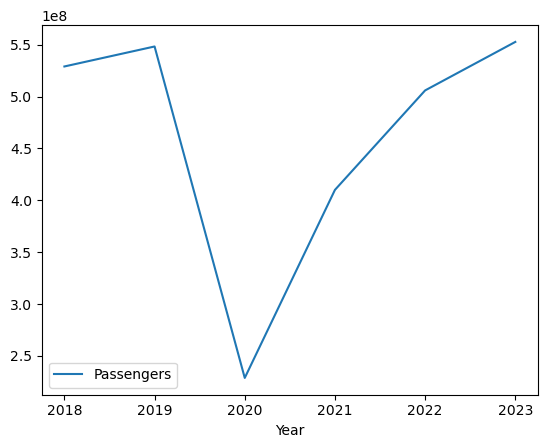

In [123]:
# Plot the number of passengers in a year by year
df_summary[['Year', 'Passengers']].groupby(['Year']).sum().plot()

In [124]:
yearly_passenger_totals = df_summary.groupby("Year")["Passengers"].sum()
cumulative_percentage_change = cumulative_percentage_change.dropna()

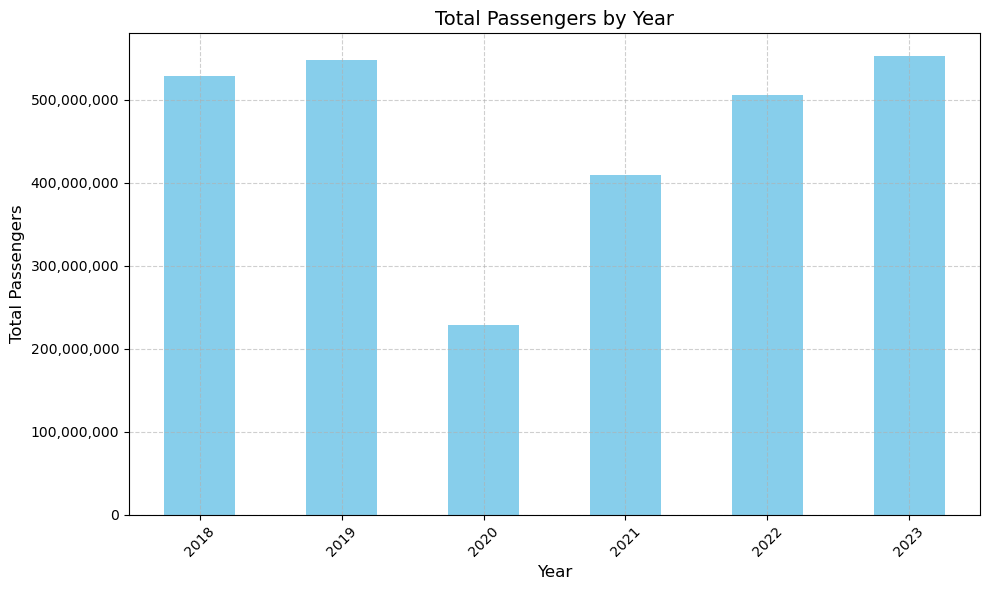

In [125]:
plt.figure(figsize=(10, 6))
ax = yearly_passenger_totals.plot(kind="bar", color="skyblue")
plt.title("Total Passengers by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)


ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)
plt.ylabel("Total Passengers", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

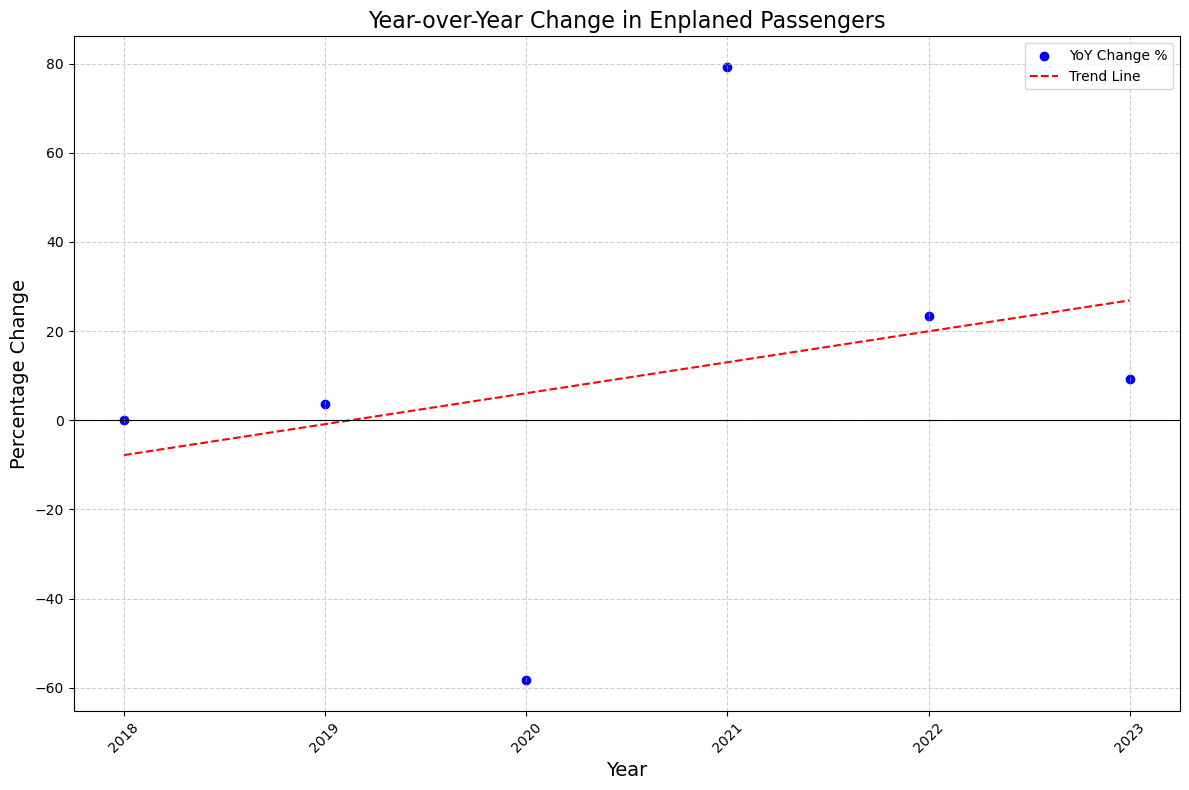

In [132]:
plt.figure(figsize=(12, 8))

# Assuming 'yearly_passenger_change' is indexed by 'Year' and holds percentage changes
years = np.array(
    yearly_passenger_change.index.tolist()
)  # Convert index to an array if not already in numeric form
percentage_changes = yearly_passenger_change.values

plt.scatter(years, percentage_changes, color="blue", label="YoY Change %")

# Calculate a trend line
z = np.polyfit(years, percentage_changes, 1)  # Fit a linear trend line
p = np.poly1d(z)  # Create a polynomial function from the fit
plt.plot(years, p(years), "r--", label="Trend Line")  # Plot trend line

# Add a horizontal line at 0% to indicate no change
plt.axhline(0, color="black", linewidth=0.8)

plt.title("Year-over-Year Change in Enplaned Passengers", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage Change", fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Customize tick parameters
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming yearly_passenger_change is indexed by Year and contains the percentage changes
years = np.array(yearly_passenger_change.index.tolist())
changes = yearly_passenger_change.values

# Calculate a trend line
z = np.polyfit(years, changes, 1)
p = np.poly1d(z)

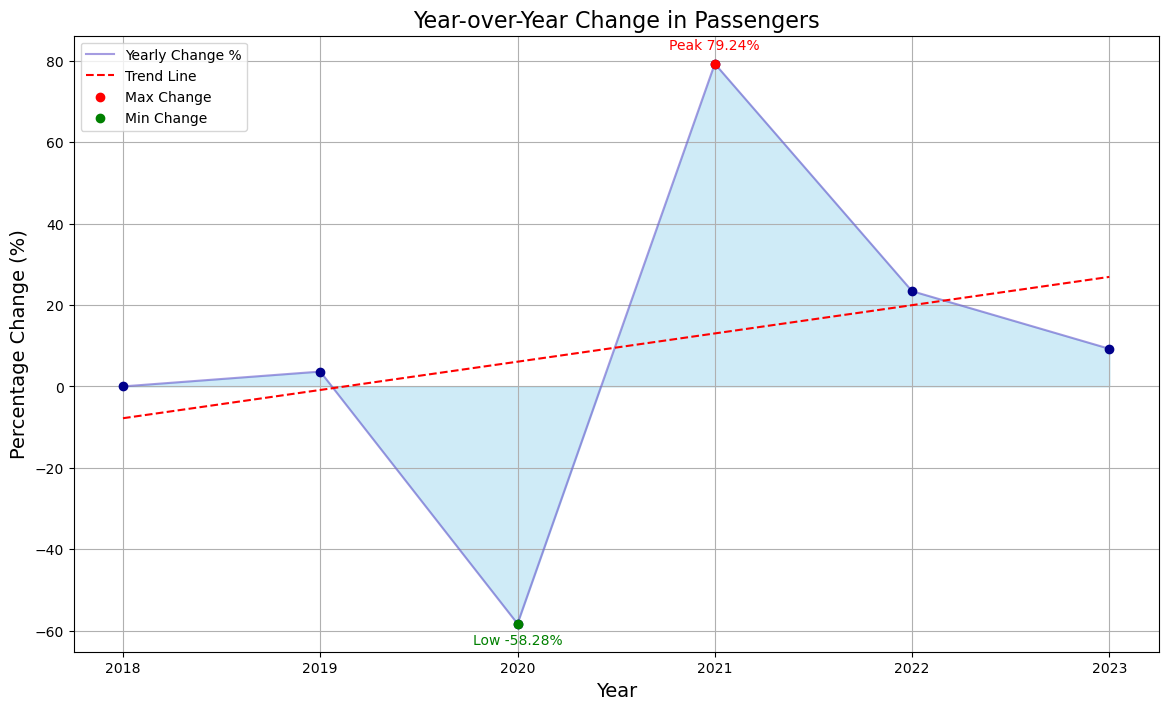

In [136]:
plt.figure(figsize=(14, 8))

# Plotting the fill between and the line
plt.fill_between(years, changes, color="skyblue", alpha=0.4)
plt.plot(years, changes, color="Slateblue", alpha=0.6, label="Yearly Change %")

# Scatter plot for the actual data points
plt.scatter(
    years, changes, color="darkblue", zorder=5
)  # Adding scatter to highlight the actual points

# Trend line
plt.plot(years, p(years), "r--", label="Trend Line")

# Finding and marking the maximum and minimum points
max_year = years[np.argmax(changes)]
min_year = years[np.argmin(changes)]
plt.scatter(
    [max_year], [changes[np.argmax(changes)]], color="red", zorder=5, label="Max Change"
)
plt.scatter(
    [min_year],
    [changes[np.argmin(changes)]],
    color="green",
    zorder=5,
    label="Min Change",
)

# Annotations for max and min
plt.annotate(
    f"Peak {changes[np.argmax(changes)]:.2f}%",
    (max_year, changes[np.argmax(changes)]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
plt.annotate(
    f"Low {changes[np.argmin(changes)]:.2f}%",
    (min_year, changes[np.argmin(changes)]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

plt.title("Year-over-Year Change in Passengers", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage Change (%)", fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [128]:
# Group by 'Year' and sum 'Passengers', then calculate percentage change
passenger_totals = df_summary.groupby("Year")["Passengers"].sum()
baseline_passengers = passenger_totals.iloc[0]
cumulative_percentage_change = (passenger_totals / baseline_passengers - 1) * 100

# Reset index if necessary for plotting
cumulative_percentage_change = cumulative_percentage_change.reset_index()

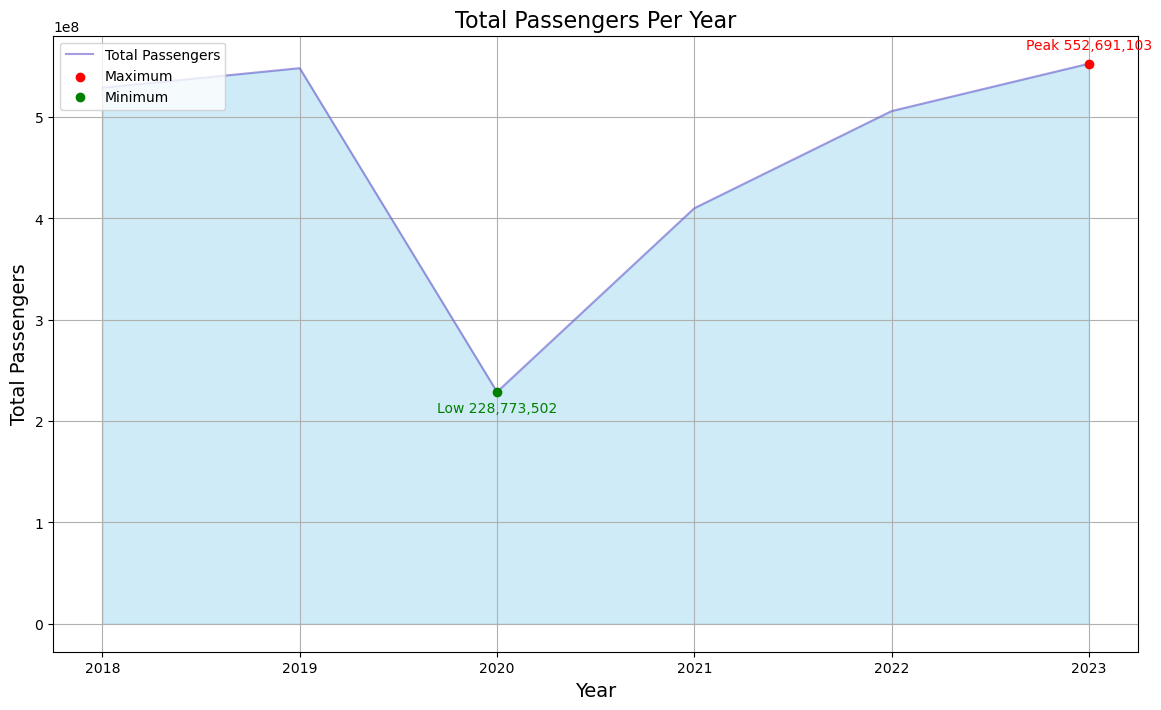

In [137]:
plt.figure(figsize=(14, 8))
plt.plot(
    yearly_passenger_totals.index,
    yearly_passenger_totals,
    color="Slateblue",
    alpha=0.6,
    label="Total Passengers",
)
plt.fill_between(
    yearly_passenger_totals.index, yearly_passenger_totals, color="skyblue", alpha=0.4
)

# Highlighting the maximum and minimum points
max_year = yearly_passenger_totals.idxmax()
min_year = yearly_passenger_totals.idxmin()
plt.scatter(
    [max_year],
    [yearly_passenger_totals[max_year]],
    color="red",
    zorder=5,
    label="Maximum",
)
plt.scatter(
    [min_year],
    [yearly_passenger_totals[min_year]],
    color="green",
    zorder=5,
    label="Minimum",
)

# Annotations
plt.annotate(
    f"Peak {yearly_passenger_totals[max_year]:,}",
    (max_year, yearly_passenger_totals[max_year]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
plt.annotate(
    f"Low {yearly_passenger_totals[min_year]:,}",
    (min_year, yearly_passenger_totals[min_year]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

plt.title("Total Passengers Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Passengers", fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Passengers
ax.fill_between(
    df_monthly_sums.index,
    df_monthly_sums["Passengers"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_sums.index,
    df_monthly_sums["Passengers"],
    color="Slateblue",
    alpha=0.6,
    label="Total  Passengers",
)

# Calculate the average and add a horizontal line
average_passengers = df_monthly_sums["Passengers"].mean()
ax.axhline(
    y=average_passengers,
    color="green",
    linestyle="--",
    label=f"Average Enplaned Passengers: {average_passengers:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the average number of enplaned passengers over the displayed period.\nAverage passengers: {average_passengers:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    average_passengers - df_monthly_sums["Enplaned Passengers"].min()
) / (
    df_monthly_sums["Enplaned Passengers"].max()
    - df_monthly_sums["Enplaned Passengers"].min()
)
ax.text(
    0.05,
    vertical_position + 0.05,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_sums["Passengers"].idxmax()
min_point = df_monthly_sums["Passengers"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_sums["Passengers"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_sums["Passengers"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_sums['Passengers'][max_point]:,.0f}",
    (max_point, df_monthly_sums["Passengers"][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_sums['Passengers'][min_point]:,.0f}",
    (min_point, df_monthly_sums["Passengers"][min_point]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2022-12-31")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Total Passengers Over Time", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Total  Passengers", fontsize=14)
ax.grid(True)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [117]:
baseline = df_summary["Passengers"].iloc[0]
df_summary["cumulative_percentage_change"] = (
    df_summary["Passengers"] / baseline - 1
) * 100

In [118]:
import matplotlib.pyplot as plt

# Assuming 'cumulative_percentage_change' has been calculated as shown
plt.figure(figsize=(14, 8))
plt.fill_between(
    cumulative_percentage_change.index,
    cumulative_percentage_change,
    color="skyblue",
    alpha=0.4,
)
(line,) = plt.plot(
    cumulative_percentage_change.index,
    cumulative_percentage_change,
    color="Slateblue",
    alpha=0.6,
)

# Highlighting the maximum and minimum points
max_year = cumulative_percentage_change.idxmax()
min_year = cumulative_percentage_change.idxmin()
plt.scatter(
    [max_year], [cumulative_percentage_change[max_year]], color="red", zorder=5
)  # Zorder for layering
plt.scatter(
    [min_year], [cumulative_percentage_change[min_year]], color="green", zorder=5
)

# Annotations
plt.annotate(
    f"Peak {cumulative_percentage_change[max_year]*100:.2f}%",
    (max_year, cumulative_percentage_change[max_year]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
plt.annotate(
    f"Low {cumulative_percentage_change[min_year]*100:.2f}%",
    (min_year, cumulative_percentage_change[min_year]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

plt.title(
    "Cumulative Percentage Change of Passenger traffic from 2018 to 2023", fontsize=16
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cumulative Percentage Change", fontsize=14)
plt.grid(True)
plt.legend([line], ["Cumulative Change"], loc="upper center")
plt.show()

NameError: name 'cumulative_percentage_change' is not defined

<Figure size 1400x800 with 0 Axes>

We can clearly see that when Covid started in 2020, the passenger volume dropped dramatically.

Let's take a closer look by restricting our time period to January 2020 to June 2023.

In [70]:
# Create DataFrame for time period January 2020 to June 2023.
df_covid = df_summary.loc[(df_summary['Year-Month']>'2019-12') & (df_summary['Year-Month']<'2023-07')]
display(df_covid.head())
display(df_covid.tail())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
720,2020,1,1,2020-01,ATL,Atlanta,GA,32197,3530955,8.09,79,0.25,359.58,427.22,109.667205
721,2020,1,1,2020-01,AUS,Austin,TX,5356,601201,7.93,34,0.63,317.02,376.66,112.248133
722,2020,1,1,2020-01,BNA,Nashville,TN,6784,631344,7.14,64,0.94,326.36,387.75,93.063679
723,2020,1,1,2020-01,BOS,Boston,MA,12333,1132859,8.17,51,0.41,324.85,385.96,91.855915
724,2020,1,1,2020-01,BWI,Baltimore,MD,7972,885685,6.22,66,0.83,308.59,366.64,111.099473


,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
1975,2023,2,6,2023-06,SAN,San Diego,CA,7897,1063761,18.01,80,1.01,390.26,393.65,134.704445
1976,2023,2,6,2023-06,SEA,Seattle,WA,16089,2081566,13.72,112,0.70,409.93,413.48,129.378209
1977,2023,2,6,2023-06,SFO,San Francisco,CA,12007,1646843,20.38,233,1.94,466.42,470.46,137.156908
1978,2023,2,6,2023-06,SLC,Salt Lake City,UT,9124,1077389,15.37,76,0.83,452.03,455.95,118.082968
1979,2023,2,6,2023-06,TPA,Tampa,FL,6196,915150,26.53,96,1.55,335.18,338.09,147.700129


Passengers  Cancelled Flights  No. of Flights
Year Month                                               
2020 1        41752105               4832          416302
     2        40355702               3520          391911
     3        23034636              77451          441010
     4         1998232              81236          202032
     5         6311191               4950          115353
     6        10659489                514          146739
     7        15291508               1849          233581
     8        16600188               2309          251259
     9        16569602               1246          220681
     10       19410767                640          238364
     11       18090106               1374          247205
     12       18699976               2687          252092
2021 1        16852087               2443          239912
     2        16770353              12679          221155
     3        26546993               3799          293591
     4        29632600               1627          299702
     5        35832899               1370          330051
     6        40142526               5780          357760
     7        44467435               6156          383616
     8        40913550              11578          383994
     9        36749109               4476          360233
     10       41151409               7564          378322
     11       40670798               2465          369676
     12       40318229               8581          370531
2022 1        30947636              23571          360413
     2        33068899              14711          332410
     3        43403505               5429          376354
     4        42776989               8797          369299
     5        45203626               8212          385782
     6        45114228              13168          382372
     7        46242366               7541          392580
     8        44769027              10487          391729
     9        42672774               5775          372408
     10       46174267               2801          383805
     11       43113387               4234          365955
     12       42453458              18045          371271
2023 1        39630124               6882          369639
     2        38325690               6198          344918
     3        46993371               5218          396206
     4        45648758               7144          383585
     5        48286419               2464          397052
     6        48481588               9059          391492

Passengers           int64
Cancelled Flights    int64
No. of Flights       int64
dtype: object


array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>,
       <Axes: xlabel='Year,Month'>], dtype=object)

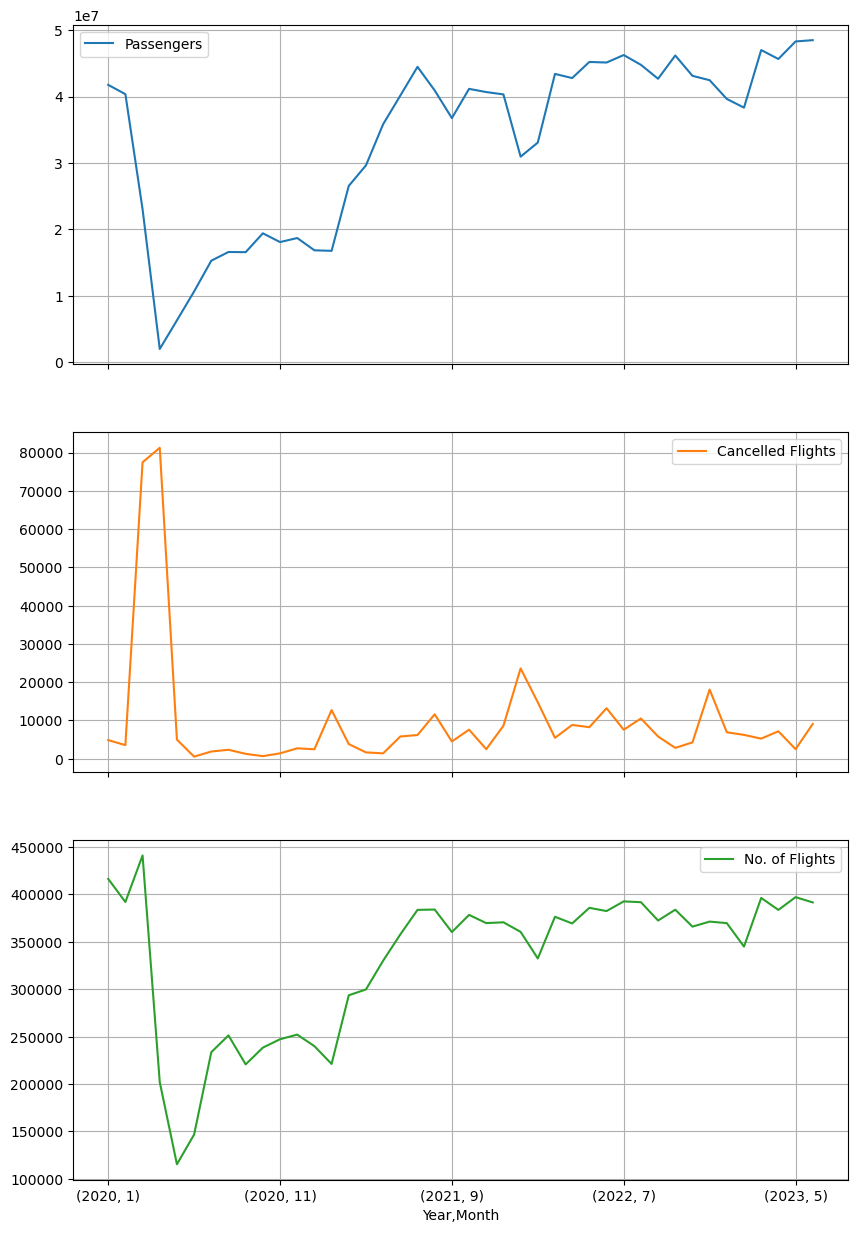

In [144]:
# Plot the number of flights, the number of passengers and the number of cancelled flights for every month between
# January of 2020 and June of 2023
df_monthly_sums = df_covid[['Year',
                            'Month',
                            'Passengers',
                            'Cancelled Flights',
                            'No. of Flights']].groupby(['Year','Month']).sum()
display(df_monthly_sums)
print(df_monthly_sums.dtypes)

df_monthly_sums.plot(subplots=True, grid=True, figsize=(10,15))

In [151]:
#MultiIndex with ('Year', 'Month')
df_monthly_sums.reset_index(inplace=True)
df_monthly_sums["Date"] = pd.to_datetime(
    df_monthly_sums["Year"].astype(str) + "-" + df_monthly_sums["Month"].astype(str)
)
# Set'Date' column as the index
df_monthly_sums.set_index("Date", inplace=True)

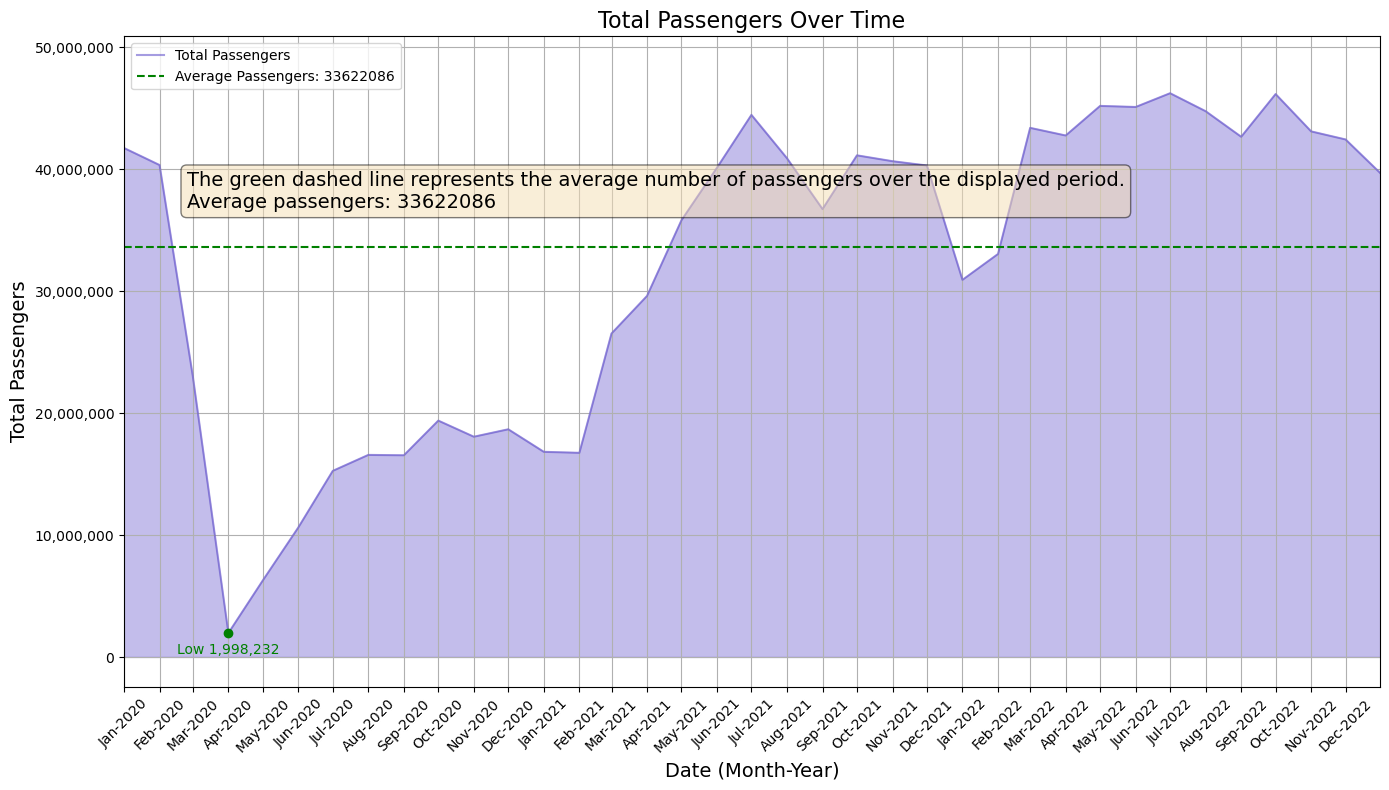

In [152]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Passengers
ax.fill_between(
    df_monthly_sums.index,
    df_monthly_sums["Passengers"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_sums.index,
    df_monthly_sums["Passengers"],
    color="Slateblue",
    alpha=0.6,
    label="Total Passengers",
)

# Calculate the average and add a horizontal line
average_passengers = df_monthly_sums["Passengers"].mean()
ax.axhline(
    y=average_passengers,
    color="green",
    linestyle="--",
    label=f"Average Passengers: {average_passengers:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the average number of passengers over the displayed period.\nAverage passengers: {average_passengers:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    average_passengers - df_monthly_sums["Passengers"].min()
) / (
    df_monthly_sums["Passengers"].max()
    - df_monthly_sums["Passengers"].min()
)
ax.text(
    0.05,
    vertical_position + 0.05,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_sums["Passengers"].idxmax()
min_point = df_monthly_sums["Passengers"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_sums["Passengers"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_sums["Passengers"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_sums['Passengers'][max_point]:,.0f}",
    (max_point, df_monthly_sums["Passengers"][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_sums['Passengers'][min_point]:,.0f}",
    (min_point, df_monthly_sums["Passengers"][min_point]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2022-12-31")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Total Passengers Over Time", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Total Passengers", fontsize=14)
ax.grid(True)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

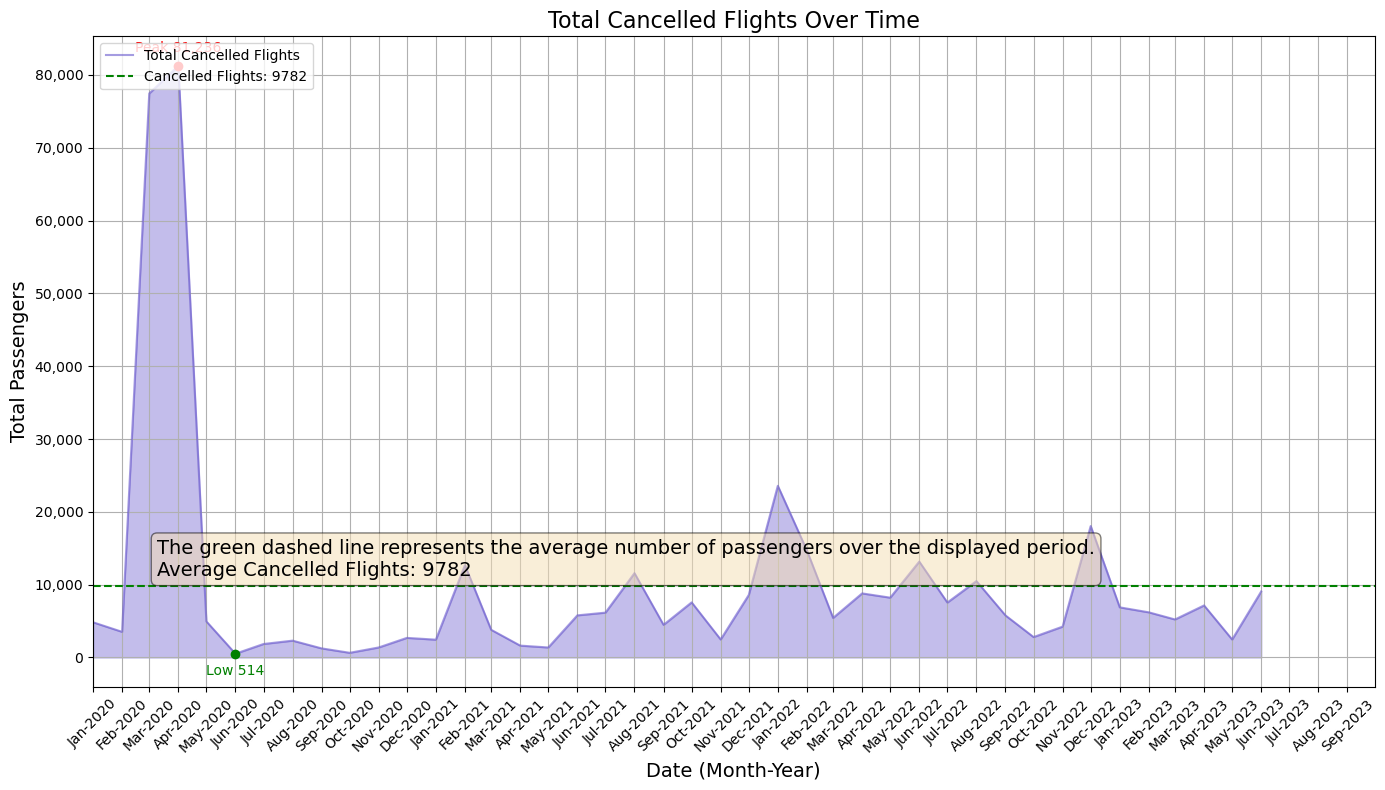

In [154]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Cancelled Flights
ax.fill_between(
    df_monthly_sums.index,
    df_monthly_sums["Cancelled Flights"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_sums.index,
    df_monthly_sums["Cancelled Flights"],
    color="Slateblue",
    alpha=0.6,
    label="Total Cancelled Flights",
)

# Calculate the average and add a horizontal line
average_cancelled_flights = df_monthly_sums["Cancelled Flights"].mean()
ax.axhline(
    y=average_cancelled_flights,
    color="green",
    linestyle="--",
    label=f"Cancelled Flights: {average_cancelled_flights:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the average number of passengers over the displayed period.\nAverage Cancelled Flights: {average_cancelled_flights:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    average_cancelled_flights - df_monthly_sums["Cancelled Flights"].min()
) / (
    df_monthly_sums["Cancelled Flights"].max()
    - df_monthly_sums["Cancelled Flights"].min()
)
ax.text(
    0.05,
    vertical_position + 0.05,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_sums["Cancelled Flights"].idxmax()
min_point = df_monthly_sums["Cancelled Flights"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_sums["Cancelled Flights"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_sums["Cancelled Flights"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_sums['Cancelled Flights'][max_point]:,.0f}",
    (max_point, df_monthly_sums["Cancelled Flights"][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_sums['Cancelled Flights'][min_point]:,.0f}",
    (min_point, df_monthly_sums["Cancelled Flights"][min_point]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2023-9-30")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Total Cancelled Flights Over Time", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Total Passengers", fontsize=14)
ax.grid(True)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

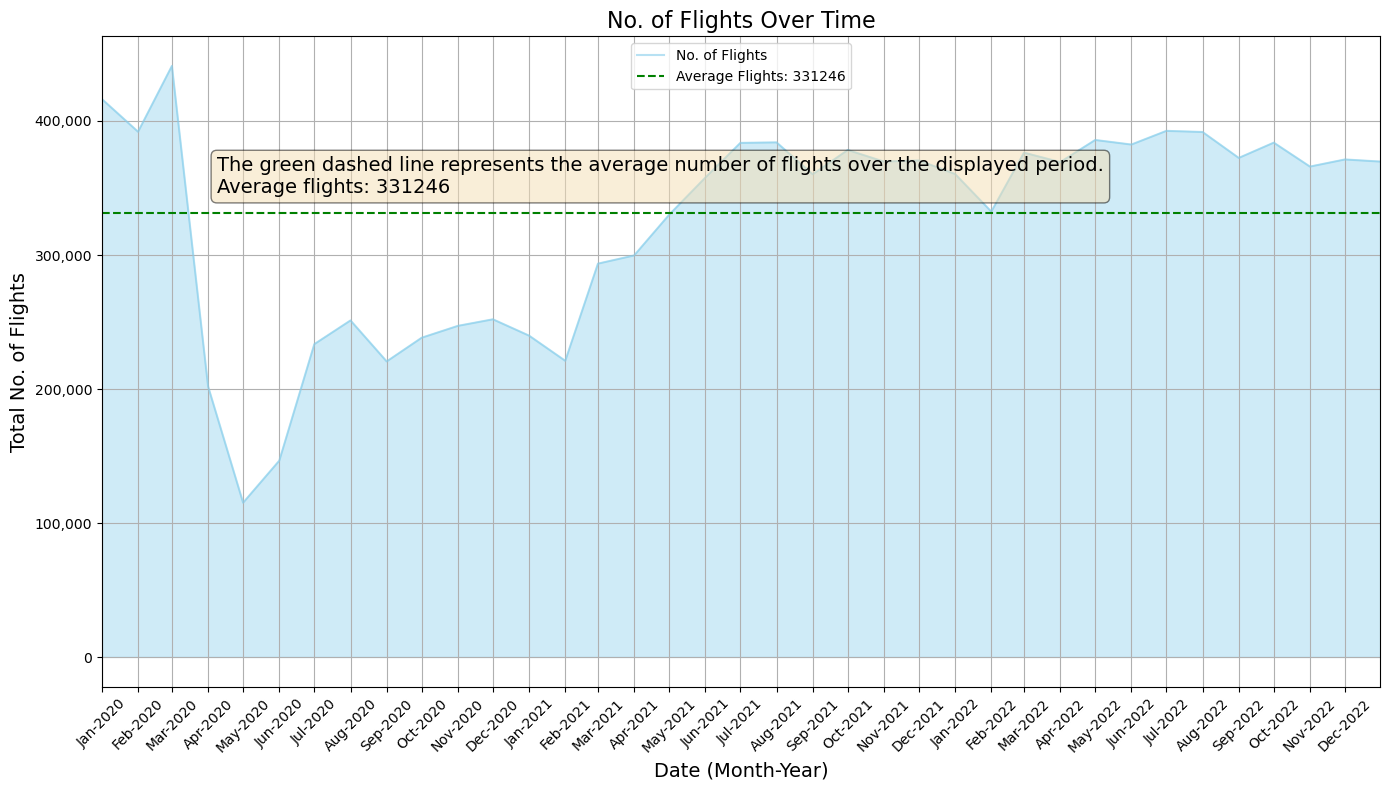

In [149]:
# Final Version
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting the number of flights
ax.fill_between(
    df_monthly_sums.index, df_monthly_sums["No. of Flights"], color="skyblue", alpha=0.4
)
ax.plot(
    df_monthly_sums.index,
    df_monthly_sums["No. of Flights"],
    color="skyblue",
    alpha=0.6,
    label="No. of Flights",
)

# Calculate the average and add a horizontal line
average_flights = df_monthly_sums["No. of Flights"].mean()
ax.axhline(
    y=average_flights,
    color="green",
    linestyle="--",
    label=f"Average Flights: {average_flights:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the average number of flights over the displayed period.\nAverage flights: {average_flights:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)

# Adjust the placement of the text box to be closer to the average line
# Determine the vertical position based on the relative height of the average line
vertical_position = (average_flights - df_monthly_sums["No. of Flights"].min()) / (
    df_monthly_sums["No. of Flights"].max() - df_monthly_sums["No. of Flights"].min()
)
ax.text(
    0.09,
    vertical_position + 0.09,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2022-12-31")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("No. of Flights Over Time", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Total No. of Flights", fontsize=14)
ax.grid(True)
ax.legend(loc="upper center")

plt.tight_layout()
plt.show()

Passengers per Flight  Cancelled %  Average Delay (Minutes)  \
Year Month                                                                
2020 1                     102.15         1.08                     9.70   
     2                     105.09         0.82                    10.92   
     3                      53.15        17.68                     6.85   
     4                       9.55        41.57                     3.33   
     5                      57.09         5.09                     2.79   
     6                      72.45         0.35                     4.11   
     7                      63.48         0.96                     5.90   
     8                      65.64         1.08                     4.93   
     9                      76.55         0.50                     3.90   
     10                     83.16         0.20                     5.27   
     11                     74.09         0.60                     4.97   
     12                     76.03         1.24                     7.82   
2021 1                      72.03         1.06                     7.07   
     2                      77.63         6.23                    10.31   
     3                      92.08         1.01                     6.56   
     4                     101.02         0.59                     7.78   
     5                     110.75         0.32                     9.12   
     6                     114.52         1.61                    18.06   
     7                     118.40         1.73                    19.53   
     8                     108.99         2.96                    17.31   
     9                     103.36         1.38                    10.34   
     10                    110.25         1.95                    12.45   
     11                    111.33         0.64                     9.92   
     12                    109.84         2.30                    15.30   
2022 1                      86.49         6.71                    14.37   
     2                     100.69         4.14                    14.59   
     3                     116.43         1.48                    15.76   
     4                     117.14         2.49                    16.77   
     5                     118.40         2.12                    15.79   
     6                     119.57         3.49                    18.88   
     7                     119.24         1.90                    17.44   
     8                     115.59         2.66                    17.28   
     9                     115.27         1.84                    11.91   
     10                    121.23         0.74                    11.07   
     11                    118.59         1.11                    13.34   
     12                    114.12         5.20                    20.78   
2023 1                     107.47         1.85                    17.13   
     2                     111.70         1.74                    13.96   
     3                     119.20         1.31                    16.84   
     4                     119.70         1.87                    18.10   
     5                     121.93         0.59                    13.24   
     6                     124.70         2.34                    22.82   

            Inflation Adjusted Average Fare ($)  
Year Month                                       
2020 1                                   397.53  
     2                                   397.53  
     3                                   397.53  
     4                                   315.80  
     5                                   315.80  
     6                                   315.80  
     7                                   281.69  
     8                                   281.69  
     9                                   281.69  
     10                                  296.78  
     11                                  296.78  
     12                                  296.78  
2021 1     

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>,
       <Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

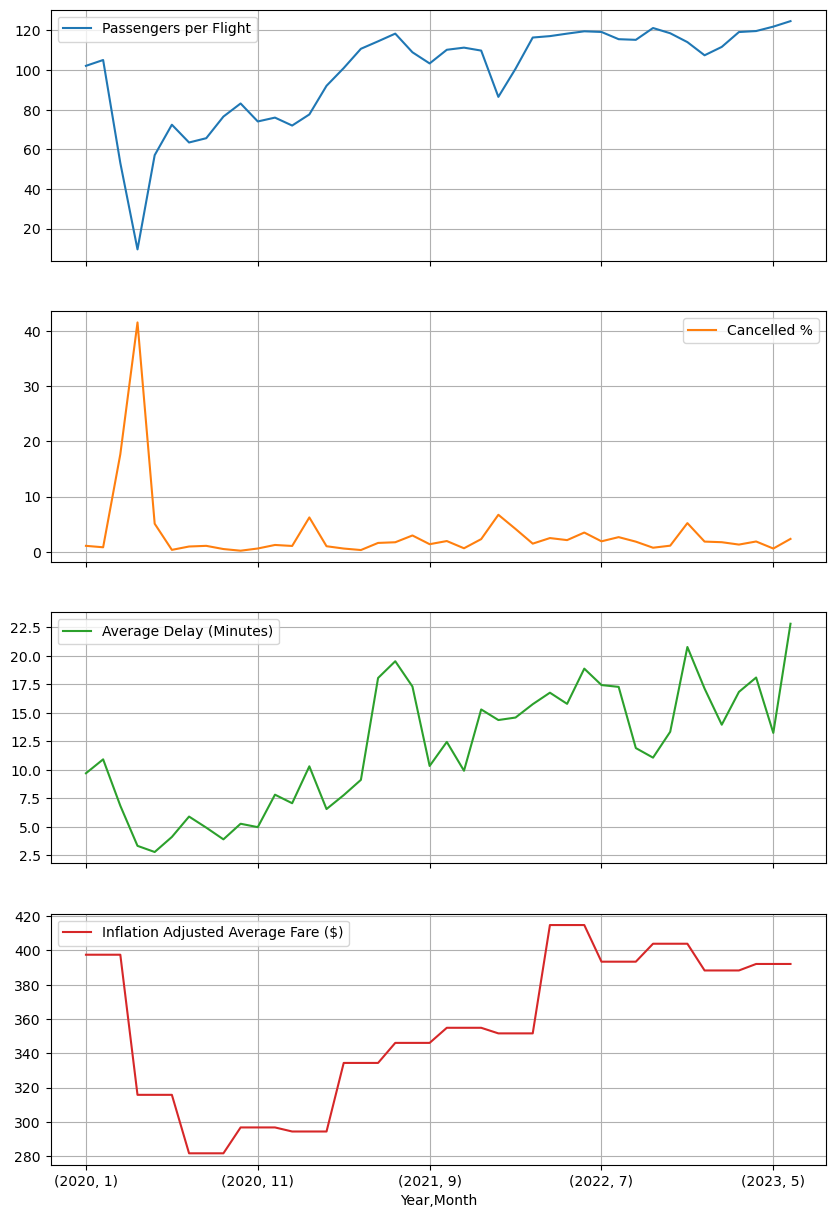

In [72]:
# Plot the average cancellation percentage, arrival delays, and the inflation adjusted airfare by month from
# January of 2020 to June of 2023 
df_monthly_means = df_covid[['Year',
                             'Month',
                             'Cancelled %',
                             'Cancelled %',
                             'Average Delay (Minutes)',
                             'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)
display(df_monthly_means)

df_monthly_means.plot(subplots=True, grid=True, figsize=(10,15))

In [157]:
# MultiIndex with ('Year', 'Month')
df_monthly_means.reset_index(inplace=True)
df_monthly_means["Date"] = pd.to_datetime(
    df_monthly_means["Year"].astype(str) + "-" + df_monthly_means["Month"].astype(str)
)
# Set'Date' column as the index
df_monthly_means.set_index("Date", inplace=True)

In [ ]:
# Showing avg cancelled % per flight.

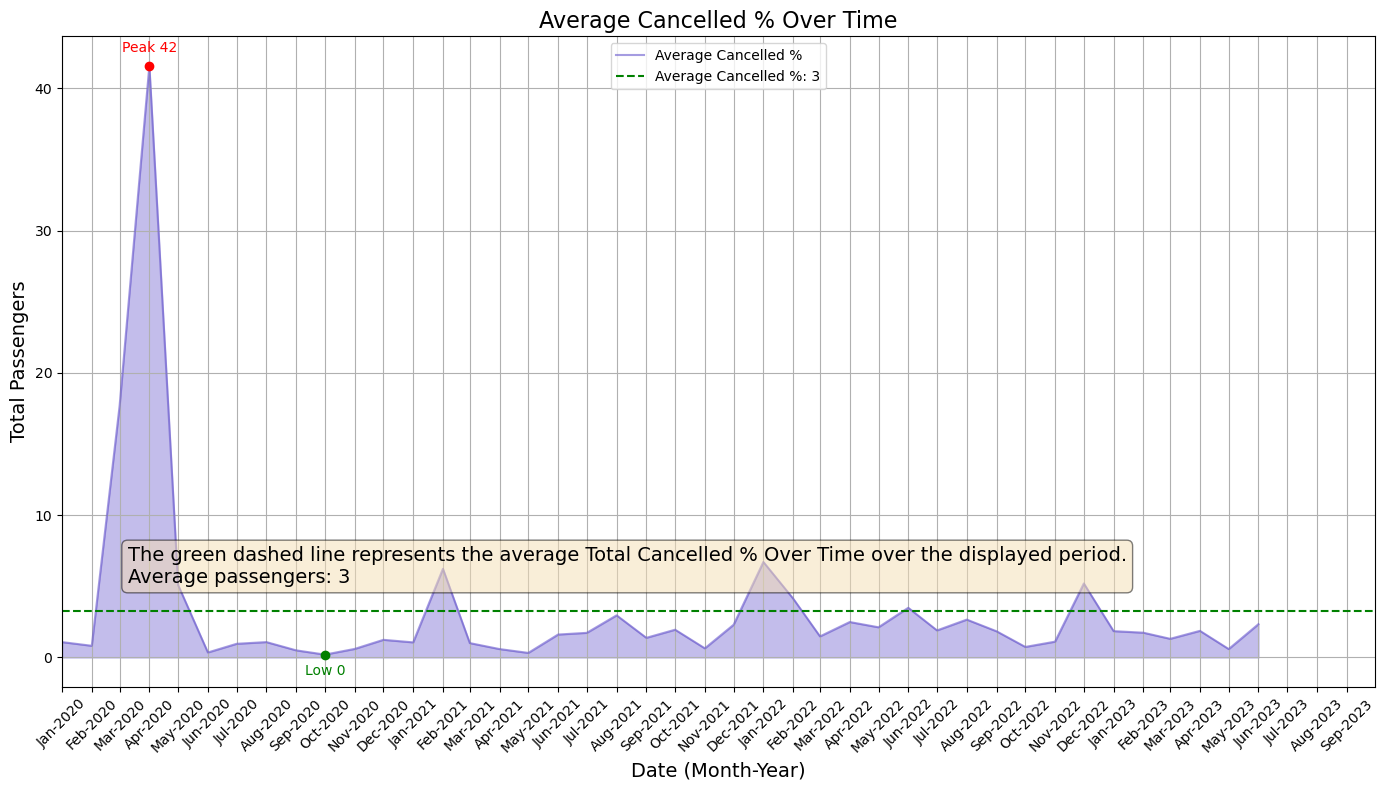

In [176]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Passengers
ax.fill_between(
    df_monthly_means.index,
    df_monthly_means["Cancelled %"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_means.index,
    df_monthly_means["Cancelled %"],
    color="Slateblue",
    alpha=0.6,
    label="Average Cancelled %",
)

# Calculate the average and add a horizontal line
average_cancelled_percent = df_monthly_means["Cancelled %"].mean()
ax.axhline(
    y=average_cancelled_percent,
    color="green",
    linestyle="--",
    label=f"Average Cancelled %: {average_cancelled_percent:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the average Total Cancelled % Over Time over the displayed period.\nAverage passengers: {average_cancelled_percent:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    average_cancelled_percent - df_monthly_means["Cancelled %"].min()
) / (df_monthly_means["Cancelled %"].max() - df_monthly_means["Cancelled %"].min())
ax.text(
    0.05,
    vertical_position + 0.08,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_means["Cancelled %"].idxmax()
min_point = df_monthly_means["Cancelled %"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_means["Cancelled %"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_means["Cancelled %"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_means['Cancelled %'][max_point]:,.0f}",
    (max_point, df_monthly_means["Cancelled %"][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_means['Cancelled %'][min_point]:,.0f}",
    (min_point, df_monthly_means["Cancelled %"][min_point]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2023-09-30")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Average Cancelled % Over Time", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Total Passengers", fontsize=14)
ax.grid(True)
ax.legend(loc="upper center")

plt.tight_layout()
plt.show()

In [ ]:
# Showing avarage Passengers per Flight

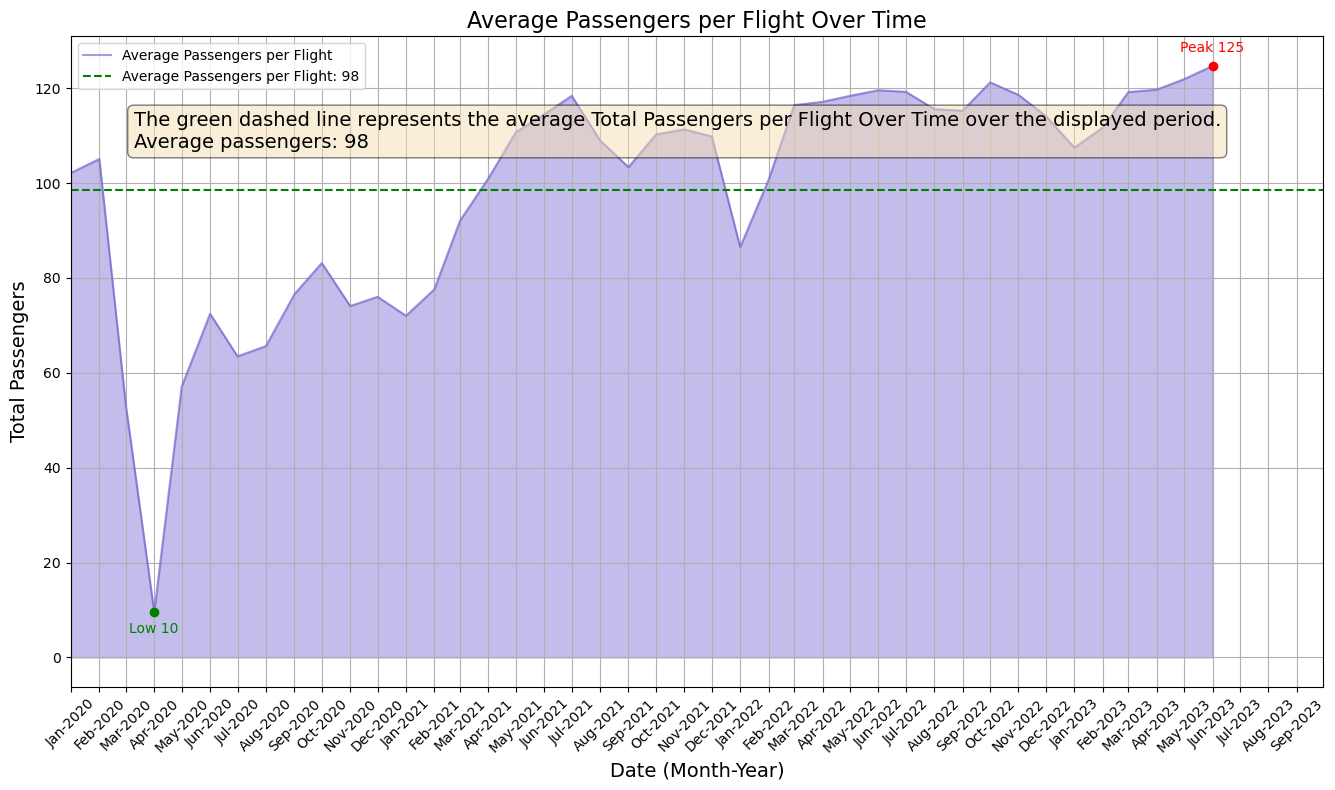

In [165]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Passengers
ax.fill_between(
    df_monthly_means.index,
    df_monthly_means["Passengers per Flight"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_means.index,
    df_monthly_means["Passengers per Flight"],
    color="Slateblue",
    alpha=0.6,
    label="Average Passengers per Flight",
)

# Calculate the average and add a horizontal line
average_passengers_per_flight = df_monthly_means["Passengers per Flight"].mean()
ax.axhline(
    y=average_passengers_per_flight,
    color="green",
    linestyle="--",
    label=f"Average Passengers per Flight: {average_passengers_per_flight:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the average Total Passengers per Flight Over Time over the displayed period.\nAverage passengers: {average_passengers_per_flight:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    average_passengers_per_flight - df_monthly_means["Passengers per Flight"].min()
) / (
    df_monthly_means["Passengers per Flight"].max()
    - df_monthly_means["Passengers per Flight"].min()
)
ax.text(
    0.05,
    vertical_position + 0.05,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_means["Passengers per Flight"].idxmax()
min_point = df_monthly_means["Passengers per Flight"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_means["Passengers per Flight"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_means["Passengers per Flight"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_means['Passengers per Flight'][max_point]:,.0f}",
    (max_point, df_monthly_means["Passengers per Flight"][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_means['Passengers per Flight'][min_point]:,.0f}",
    (min_point, df_monthly_means["Passengers per Flight"][min_point]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2023-09-30")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Average Passengers per Flight Over Time", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Total Passengers", fontsize=14)
ax.grid(True)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:
#Average Delay (Minutes)

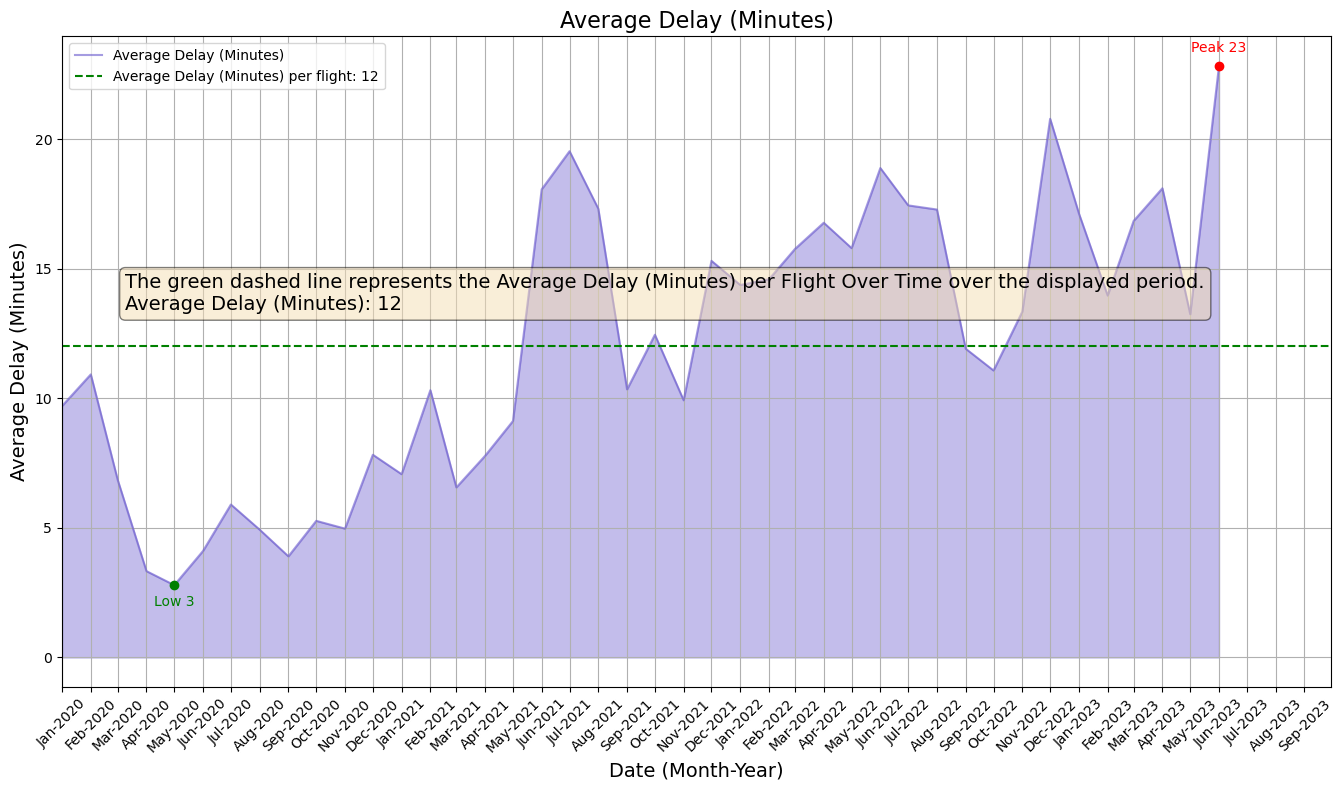

In [186]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Passengers
ax.fill_between(
    df_monthly_means.index,
    df_monthly_means["Average Delay (Minutes)"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_means.index,
    df_monthly_means["Average Delay (Minutes)"],
    color="Slateblue",
    alpha=0.6,
    label="Average Delay (Minutes)",
)

# Calculate the average and add a horizontal line
average_delay_minutes = df_monthly_means["Average Delay (Minutes)"].mean()
ax.axhline(
    y=average_delay_minutes,
    color="green",
    linestyle="--",
    label=f"Average Delay (Minutes) per flight: {average_delay_minutes:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The green dashed line represents the Average Delay (Minutes) per Flight Over Time over the displayed period.\nAverage Delay (Minutes): {average_delay_minutes:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    average_delay_minutes - df_monthly_means["Passengers per Flight"].min()
) / (
    df_monthly_means["Average Delay (Minutes)"].max()
    - df_monthly_means["Average Delay (Minutes)"].min()
)
ax.text(
    0.05,
    vertical_position + 0.45, #this line moves the text box up or down
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_means["Average Delay (Minutes)"].idxmax()
min_point = df_monthly_means["Average Delay (Minutes)"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_means["Average Delay (Minutes)"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_means["Average Delay (Minutes)"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_means['Average Delay (Minutes)'][max_point]:,.0f}",
    (max_point, df_monthly_means["Average Delay (Minutes)"][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_means['Average Delay (Minutes)'][min_point]:,.0f}",
    (min_point, df_monthly_means["Average Delay (Minutes)"][min_point]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2023-09-30")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Average Delay (Minutes)", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Average Delay (Minutes)", fontsize=14)
ax.grid(True)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

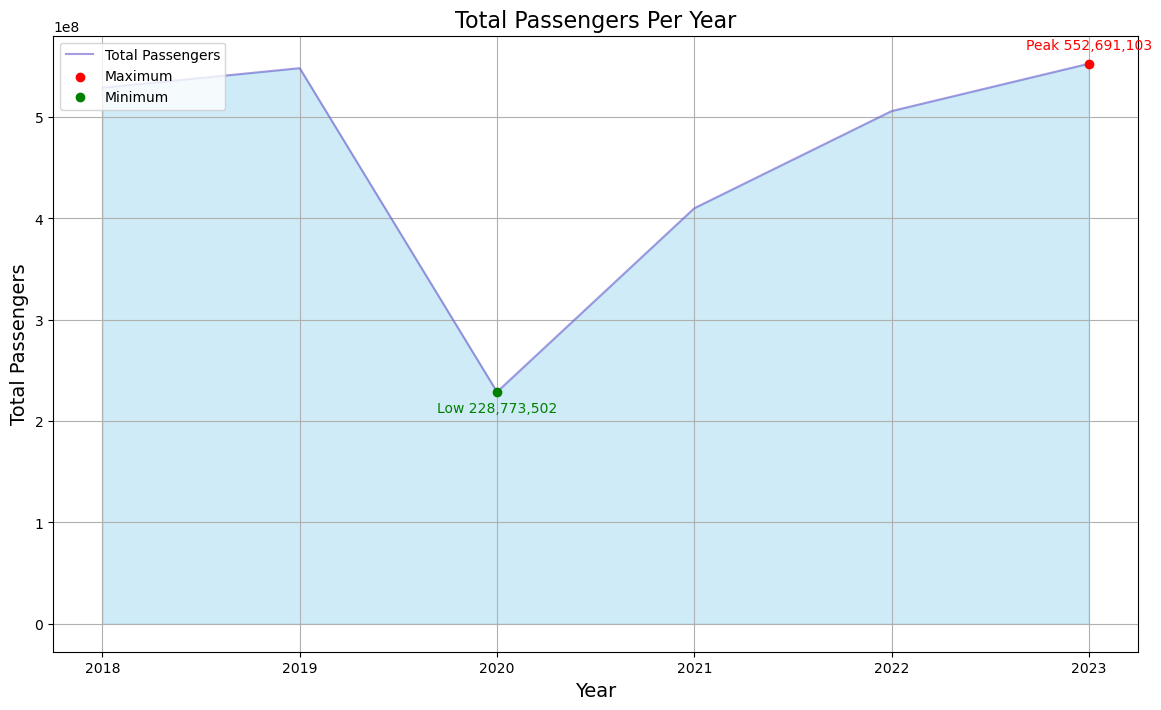

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(
    yearly_passenger_totals.index,
    yearly_passenger_totals,
    color="Slateblue",
    alpha=0.6,
    label="Total Passengers",
)
plt.fill_between(
    yearly_passenger_totals.index, yearly_passenger_totals, color="skyblue", alpha=0.4
)

# Highlighting the maximum and minimum points
max_year = yearly_passenger_totals.idxmax()
min_year = yearly_passenger_totals.idxmin()
plt.scatter(
    [max_year],
    [yearly_passenger_totals[max_year]],
    color="red",
    zorder=5,
    label="Maximum",
)
plt.scatter(
    [min_year],
    [yearly_passenger_totals[min_year]],
    color="green",
    zorder=5,
    label="Minimum",
)

# Annotations for peak and low
plt.annotate(
    f"Peak {yearly_passenger_totals[max_year]:,}",
    (max_year, yearly_passenger_totals[max_year]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
plt.annotate(
    f"Low {yearly_passenger_totals[min_year]:,}",
    (min_year, yearly_passenger_totals[min_year]),
    textcoords="offset points",
    xytext=(0, -15),
    ha="center",
    color="green",
)

plt.title("Total Passengers Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Passengers", fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# show Inflation Adjusted Average Fare ($)

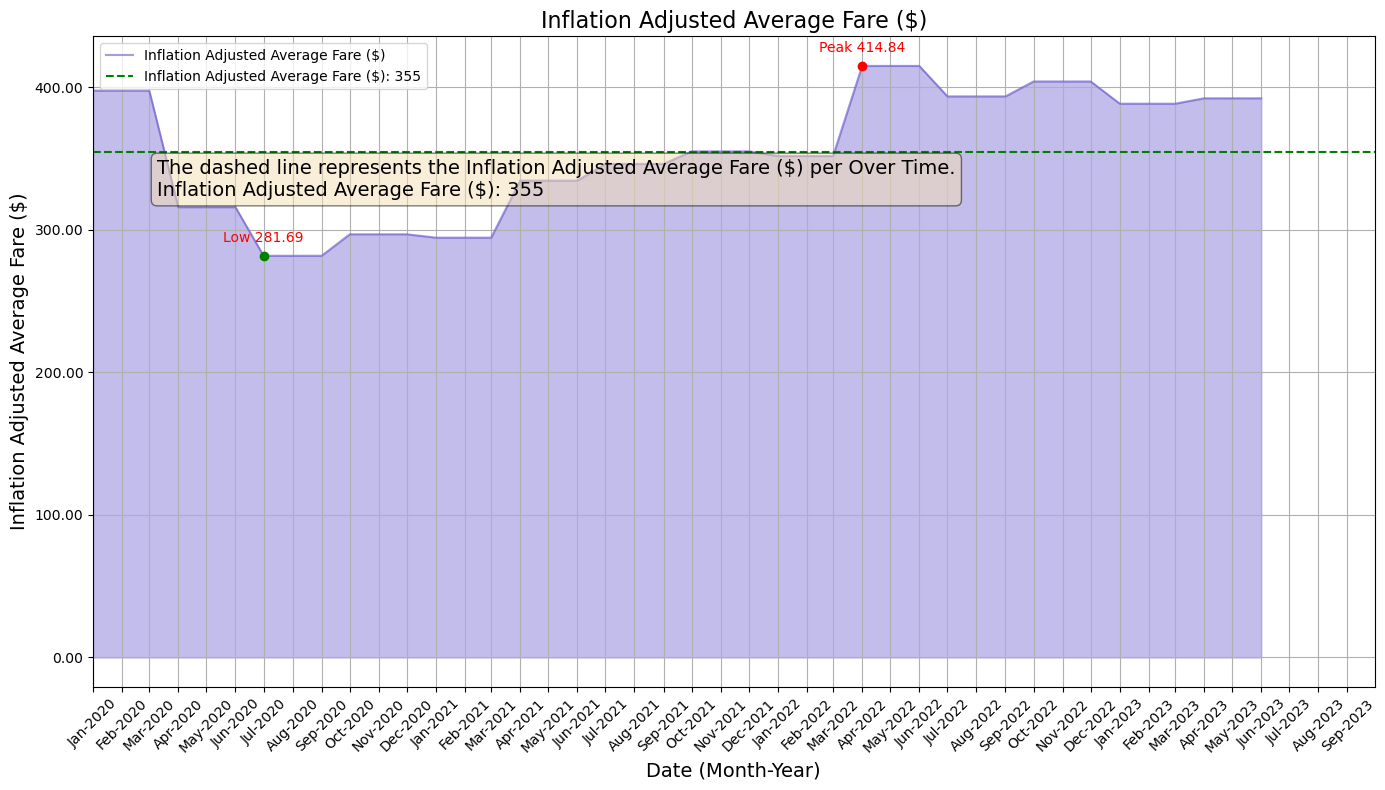

In [195]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as patches

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plotting Passengers
ax.fill_between(
    df_monthly_means.index,
    df_monthly_means["Inflation Adjusted Average Fare ($)"],
    color="Slateblue",
    alpha=0.4,
)
(line,) = ax.plot(
    df_monthly_means.index,
    df_monthly_means["Inflation Adjusted Average Fare ($)"],
    color="Slateblue",
    alpha=0.6,
    label="Inflation Adjusted Average Fare ($)",
)

# Calculate the average and add a horizontal line
inflation_adjusted_average_fare = df_monthly_means[
    "Inflation Adjusted Average Fare ($)"
].mean()
ax.axhline(
    y=inflation_adjusted_average_fare,
    color="green",
    linestyle="--",
    label=f"Inflation Adjusted Average Fare ($): {inflation_adjusted_average_fare:.0f}",
)

# Adding a text box that explains the average line
textstr = f"The dashed line represents the Inflation Adjusted Average Fare ($) per Over Time.\nInflation Adjusted Average Fare ($): {inflation_adjusted_average_fare:.0f}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
vertical_position = (
    inflation_adjusted_average_fare
    - df_monthly_means["Inflation Adjusted Average Fare ($)"].min()
) / (
    df_monthly_means["Inflation Adjusted Average Fare ($)"].max()
    - df_monthly_means["Inflation Adjusted Average Fare ($)"].min()
)
ax.text(
    0.05,
    vertical_position + 0.20,  # this line moves the text box up or down
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=props,
)

# Find and annotate the maximum and minimum points
max_point = df_monthly_means["Inflation Adjusted Average Fare ($)"].idxmax()
min_point = df_monthly_means["Inflation Adjusted Average Fare ($)"].idxmin()
ax.scatter(
    [max_point],
    [df_monthly_means["Inflation Adjusted Average Fare ($)"][max_point]],
    color="red",
    zorder=5,
)
ax.scatter(
    [min_point],
    [df_monthly_means["Inflation Adjusted Average Fare ($)"][min_point]],
    color="green",
    zorder=5,
)

# Annotations for peak and low values
ax.annotate(
    f"Peak {df_monthly_means['Inflation Adjusted Average Fare ($)'][max_point]:,.2f}",
    (max_point, df_monthly_means['Inflation Adjusted Average Fare ($)'][max_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)
ax.annotate(
    f"Low {df_monthly_means['Inflation Adjusted Average Fare ($)'][min_point]:,.2f}",
    (min_point, df_monthly_means['Inflation Adjusted Average Fare ($)'][min_point]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
    color="red",
)

ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_xlim([df_monthly_sums.index.min(), pd.Timestamp("2023-09-30")])
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title("Inflation Adjusted Average Fare ($)", fontsize=16)
ax.set_xlabel("Date (Month-Year)", fontsize=14)
ax.set_ylabel("Inflation Adjusted Average Fare ($)", fontsize=14)
ax.grid(True)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

Looking at the `Passengers` column of the `df_monthly_sums` DataFrame (see above), passenger volumes recovered to its pre-Covid level between June and July of 2021 (not accounting for seasonality). Therefore, lets define three time periads"
1. Before Covid from January 2018 to February 2020.
2. During Covid from March 2020 to June 2021.
3. After Covid from July 2021 to the end of 2023.

In [73]:
# Create a DataFrame with data before Covid
df_before = df_summary.loc[df_summary['Year-Month']<'2020-03']
display(df_before.head())
display(df_before.tail())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.58,882,2.87,361.16,445.40,105.180670
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.97,102,2.16,348.72,430.06,102.551241
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,11.02,179,3.09,351.81,433.87,83.458110
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,18.42,805,7.12,323.31,398.73,90.905979
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,9.09,220,2.57,310.95,383.47,103.141589


,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
775,2020,1,2,2020-02,SAN,San Diego,CA,7484,862070,5.49,49,0.65,303.99,361.17,115.188402
776,2020,1,2,2020-02,SEA,Seattle,WA,14276,1538456,9.08,94,0.66,307.52,365.37,107.765200
777,2020,1,2,2020-02,SFO,San Francisco,CA,13197,1381182,10.89,116,0.88,371.76,441.70,104.658786
778,2020,1,2,2020-02,SLC,Salt Lake City,UT,9521,960656,8.95,27,0.28,364.52,433.09,100.898645
779,2020,1,2,2020-02,TPA,Tampa,FL,6551,883294,10.19,37,0.56,289.28,343.69,134.833461


Plot total passengers, number of flights, and cancelled flights for every month before Covid.

Passengers  Cancelled Flights  No. of Flights
Year Month                                               
2018 1        38293821              12239          397081
     2        36816020               6546          362103
     3        45294209              13471          424653
     4        44028951               4537          414163
     5        46154923               5403          428869

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>,
       <Axes: xlabel='Year,Month'>], dtype=object)

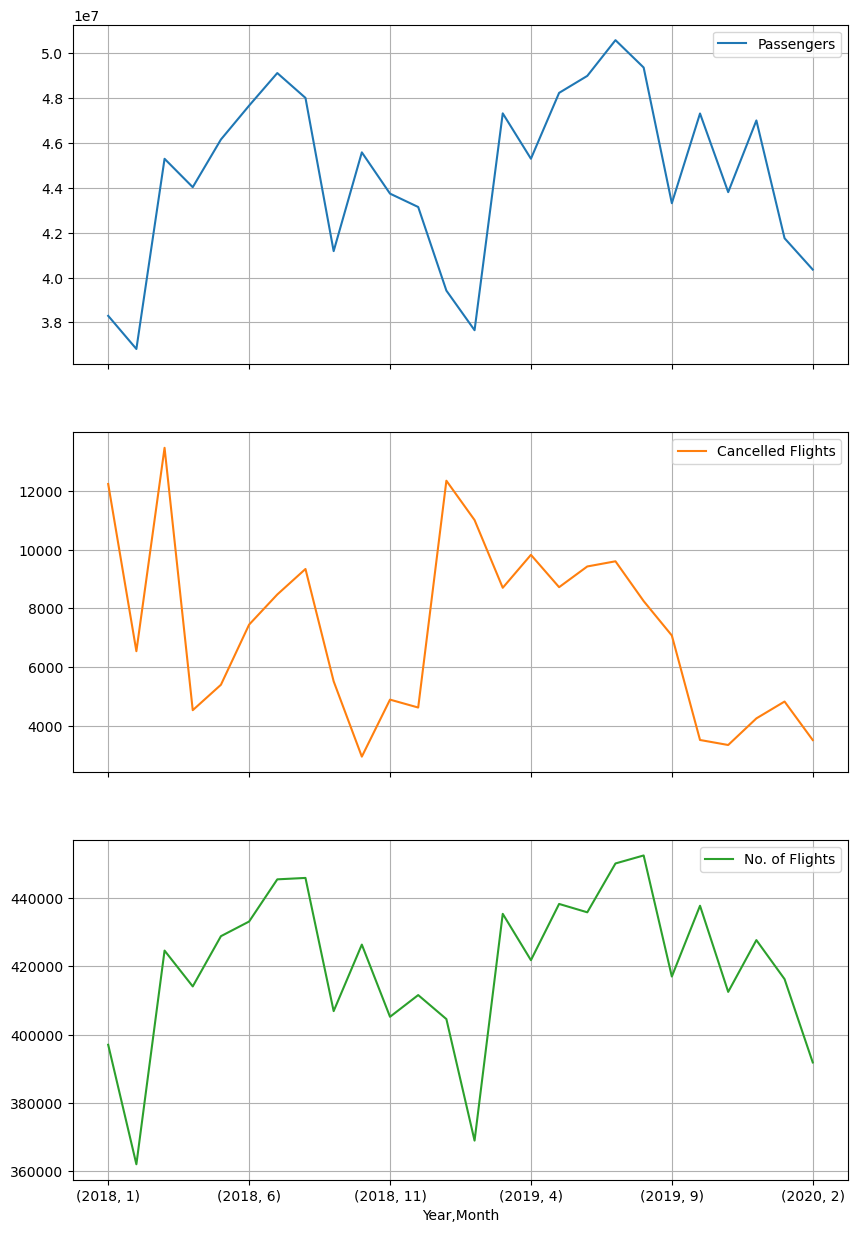

In [201]:
df_before_monthly_sums = df_before[['Year',
                                    'Month',
                                    'Passengers',
                                    'Cancelled Flights',
                                    'No. of Flights']].groupby(['Year','Month']).sum()
display(df_before_monthly_sums.head())

df_before_monthly_sums.plot(subplots=True, grid=True, figsize=(10,15))

In [205]:
import pandas as pd

#formatting data to plot
df_before_monthly_sums.reset_index(inplace=True)
df_before_monthly_sums["Date"] = pd.to_datetime(
    df_before_monthly_sums["Year"].astype(str)
    + "-"
    + df_before_monthly_sums["Month"].astype(str)
)
df_before_monthly_sums.set_index("Date", inplace=True)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Titles for each subplot
titles = [
    "Total Passengers Per Month",
    "Number of Flights Per Month",
    "Cancelled Flights Per Month",
]
y_labels = ["Total Passengers", "Total Flights", "Total Cancelled Flights"]

for ax, column, title, label in zip(
    axes, df_before_monthly_sums.columns, titles, y_labels
):
    ax.plot(df_before_monthly_sums.index, df_before_monthly_sums[column])
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(label, fontsize=12)
    ax.grid(True)

# Set common X label
fig.supxlabel("Date", fontsize=12)

# Improve the spacing between the plots
plt.tight_layout(pad=3.0)

# Show plot
plt.show()

Plot average passengers per flight, flight cancellation percentage, average arrival delay, and inflation adjusted fare for every month before Covid.

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>,
       <Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

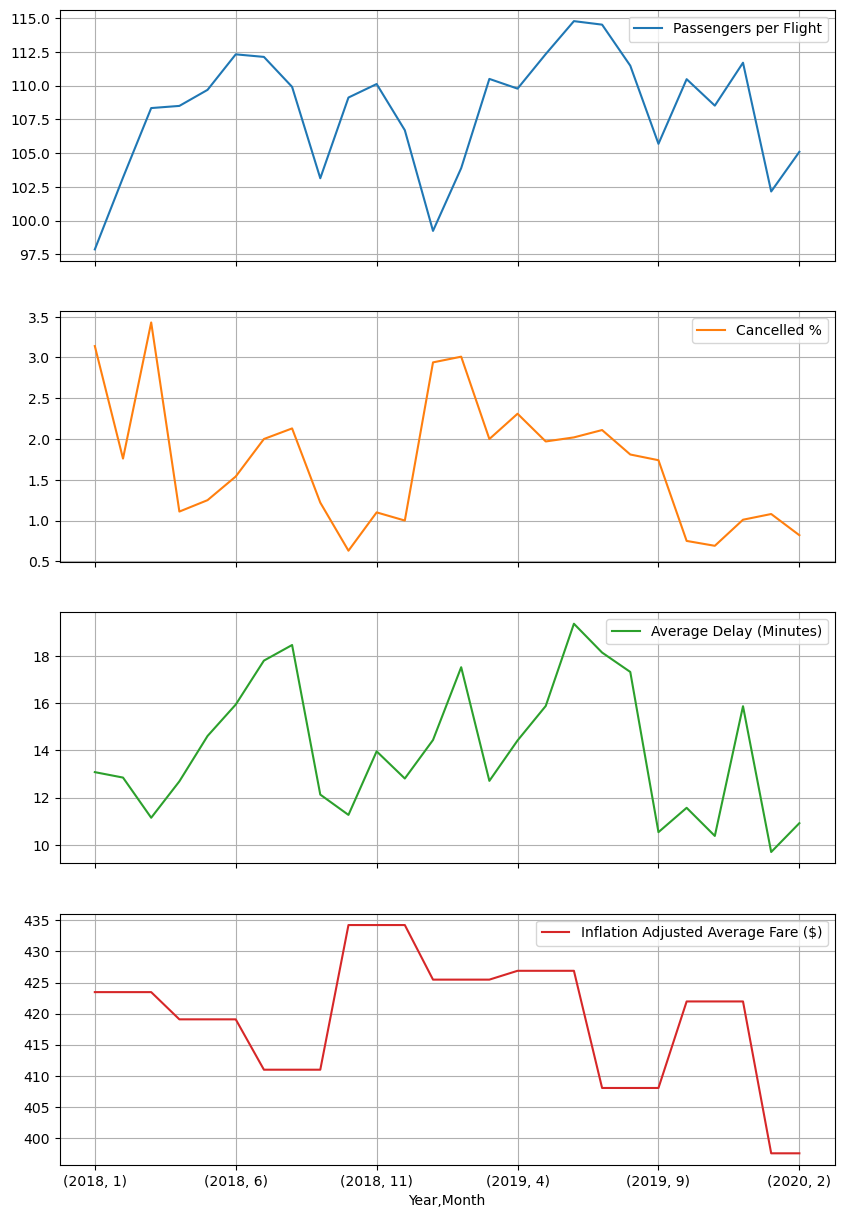

In [75]:
df_before_monthly_means = df_before[['Year',
                                     'Month',
                                     'Passengers per Flight',
                                     'Cancelled %',
                                     'Average Delay (Minutes)',
                                     'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)

df_before_monthly_means.plot(subplots=True, grid=True, figsize=(10,15))

In [76]:
# Combine the sums and the means
df_before_monthly_combined = pd.merge(df_before_monthly_sums, df_before_monthly_means,
                                      how='inner',
                                      on=['Year', 'Month'])
df_before_monthly_combined.rename(columns={'Passengers' : 'Total Passengers',
                                           'Cancelled Flights': 'Total Cancelled Flights',
                                           'No. of Flights': 'Total Flights',
                                           'Passengers per Flight': 'Average Passengers per Flight',
                                           'Cancelled %': 'Average Cancelled %',
                                           'Inflation Adjusted Average Fare ($)': 'Average Fare ($)'}, inplace=True)

display(df_before_monthly_combined.head())

Total Passengers  Total Cancelled Flights  Total Flights  \
Year Month                                                             
2018 1              38293821                    12239         397081   
     2              36816020                     6546         362103   
     3              45294209                    13471         424653   
     4              44028951                     4537         414163   
     5              46154923                     5403         428869   

            Average Passengers per Flight  Average Cancelled %  \
Year Month                                                       
2018 1                              97.86                 3.14   
     2                             103.18                 1.76   
     3                             108.33                 3.43   
     4                             108.49                 1.11   
     5                             109.68                 1.25   

            Average Delay (Minutes)  Average Fare ($)  
Year Month                                             
2018 1                        13.08            423.46  
     2                        12.85            423.46  
     3                        11.15            423.46  
     4                        12.69            419.08  
     5                        14.61            419.08

In [77]:
# Create a dictionary with total averages before the Covid pandemic
total_averages_before = df_before_monthly_combined[['Total Passengers',
                                                    'Total Cancelled Flights',
                                                    'Total Flights',
                                                    'Average Passengers per Flight',
                                                    'Average Cancelled %',
                                                    'Average Delay (Minutes)',
                                                    'Average Fare ($)']].mean().round(2).to_dict()

display(total_averages_before)

print(f"Average Number of Passengers before Covid by Month: {total_averages_before['Total Passengers']:,}.")

{'Total Passengers': 44593406.0,
 'Total Cancelled Flights': 7305.65,
 'Total Flights': 419720.58,
 'Average Passengers per Flight': 108.11,
 'Average Cancelled %': 1.71,
 'Average Delay (Minutes)': 14.06,
 'Average Fare ($)': 419.44}

Average Number of Passengers before Covid by Month: 44,593,406.0.


In [78]:
# # Create a DataFrame with total averages by state before the Covid pandemic
# df_state_averages_before = df_before_monthly_combined[['State',
#                                                        'No. of Flights',
#                                                        'Passengers',
#                                                        'Passengers per Flight',
#                                                        'Average Delay (Minutes)',
#                                                        'Cancelled Flights',
#                                                        'Cancelled %',
#                                                        'Average Fare ($)',
#                                                        'Inflation Adjusted Average Fare ($)']].groupby('State').mean().round(2)

# display(df_state_averages_before)

In [79]:
# # Create a DataFrame with total averages by state before the Covid pandemic
# df_city_averages_before = df_before[['City',
#                                      'No. of Flights',
#                                      'Passengers',
#                                      'Passengers per Flight',
#                                      'Average Delay (Minutes)',
#                                      'Cancelled Flights',
#                                      'Cancelled %',
#                                      'Average Fare ($)',
#                                      'Inflation Adjusted Average Fare ($)']].groupby('City').mean().round(2)

# display(df_city_averages_before)

Plot total passengers, number of flights, and cancelled flights for every month during Covid.

array([<Axes: title={'center': 'Passengers'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'No. of Flights'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'Cancelled Flights'}, xlabel='Year,Month'>],
      dtype=object)

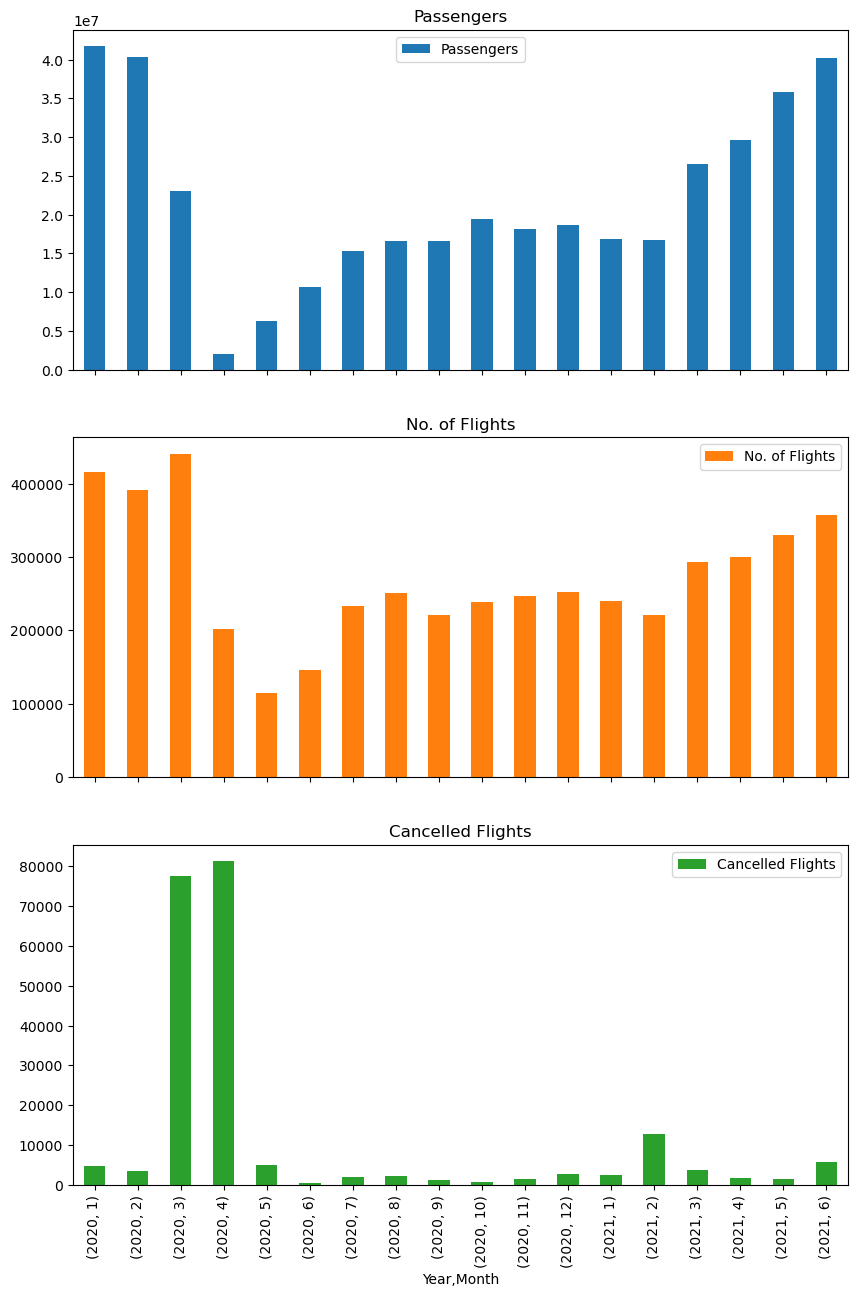

In [80]:
# Reduce the time period to January 2020 to June 2021
df_during_covid = df_covid.loc[df_summary['Year-Month']<'2021-07']

df_during_covid[['Year',
                 'Month',
                 'Passengers',
                 'No. of Flights',
                 'Cancelled Flights']].groupby(['Year','Month']).sum().plot(kind='bar', subplots=True, figsize=(10,15))

Plot average passengers per flight, flight cancellation percentage, average arrival delay, and inflation adjusted fare for every month during Covid.

array([<Axes: title={'center': 'Passengers per Flight'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'Cancelled %'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'Average Delay (Minutes)'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'Inflation Adjusted Average Fare ($)'}, xlabel='Year,Month'>],
      dtype=object)

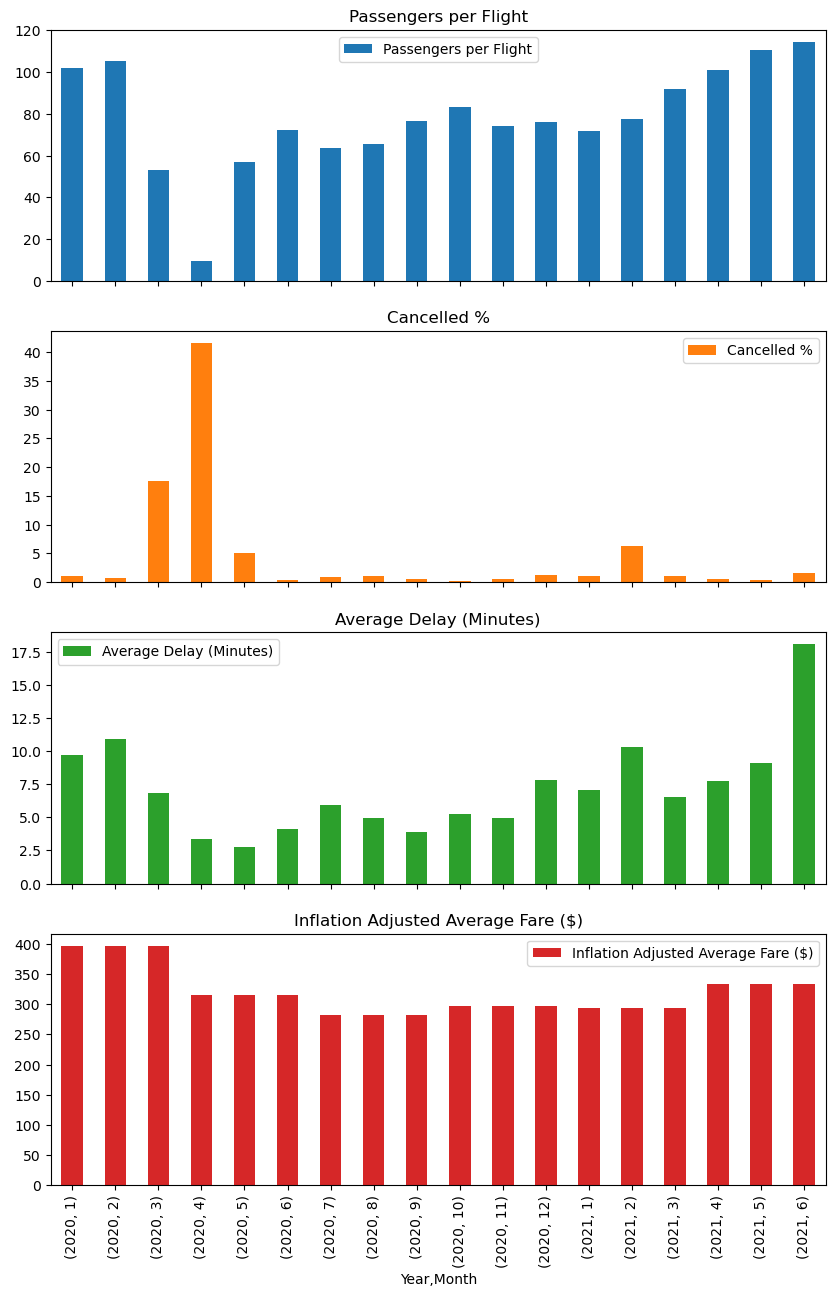

In [81]:
df_during_covid[['Year',
                'Month',
                'Passengers per Flight',
                'Cancelled %',
                'Average Delay (Minutes)',
                'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2).plot(kind='bar', subplots=True, figsize=(10,15))

Plot total passengers, number of flights, and cancelled flights for every month after Covid.

In [82]:
# Reduce the time period to July 2021 and beyond. i.e. after Covid
df_after = df_covid.loc[df_summary['Year-Month']>'2021-06']

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>,
       <Axes: xlabel='Year,Month'>], dtype=object)

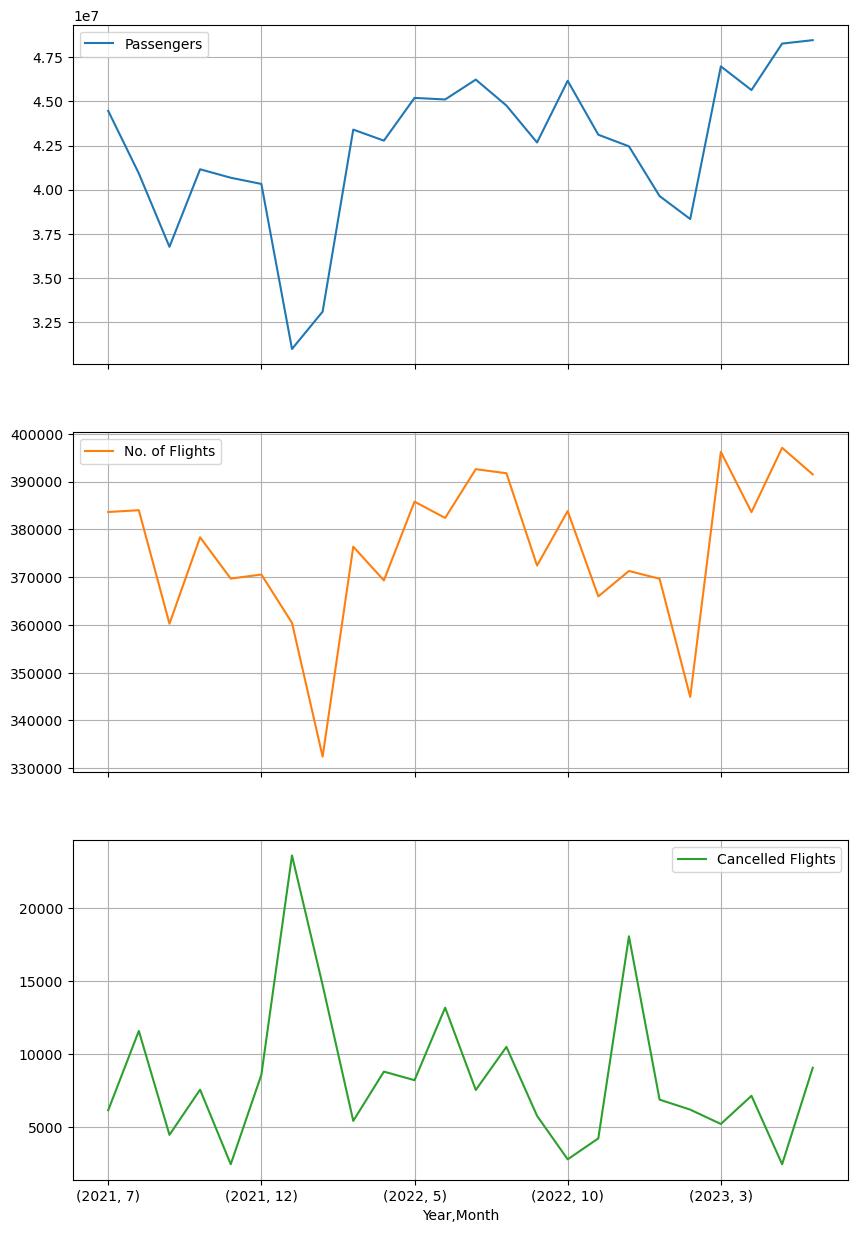

In [83]:
df_after_monthly_sums = df_after[['Year',
                                  'Month',
                                  'Passengers',
                                  'No. of Flights',
                                  'Cancelled Flights']].groupby(['Year','Month']).sum()

df_after_monthly_sums.plot(subplots=True, grid=True, figsize=(10,15))

ValueError: setting an array element with a sequence.

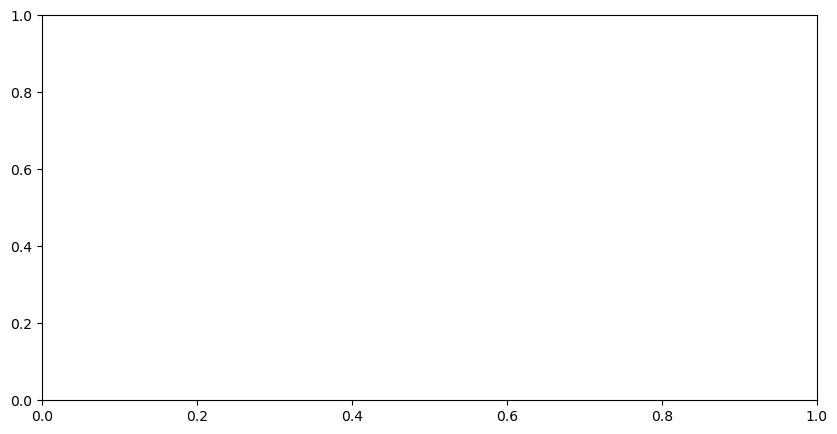

In [197]:
import matplotlib.pyplot as plt

# Plot for Total Passengers
plt.figure(figsize=(10, 5))
plt.plot(df_after_monthly_sums.index, df_after_monthly_sums['Passengers'], marker='o', linestyle='-', color='blue')
plt.title('Total Passengers Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Passengers', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot average passengers per flight, flight cancellation percentage, average arrival delay, and inflation adjusted fare for every month after Covid.

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>,
       <Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

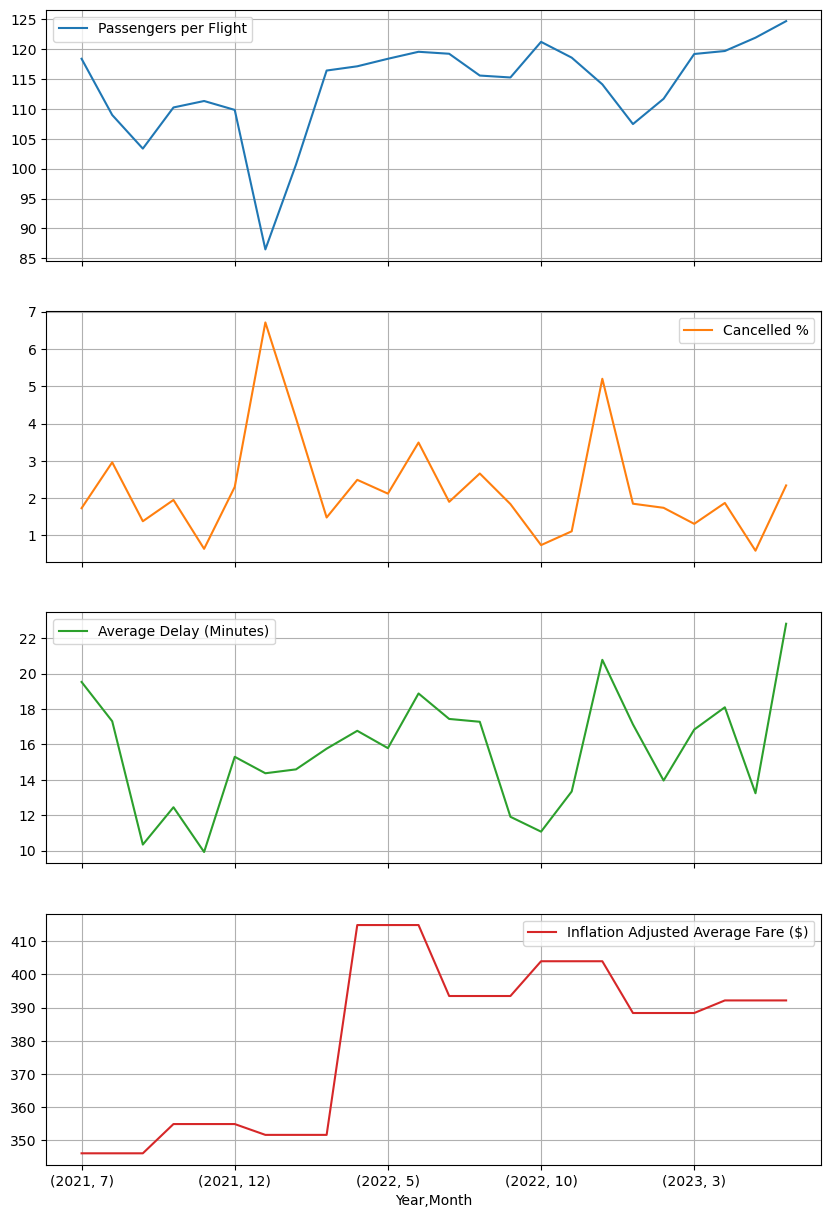

In [84]:
df_after_monthly_means = df_after[['Year',
                                   'Month',
                                   'Passengers per Flight',
                                   'Cancelled %',
                                   'Average Delay (Minutes)',
                                   'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)

df_after_monthly_means.plot(subplots=True, grid=True, figsize=(10,15))

In [85]:
# Combine the sums and the means
df_after_monthly_combined = pd.merge(df_after_monthly_sums, df_after_monthly_means,
                                      how='inner',
                                      on=['Year', 'Month'])
df_after_monthly_combined.rename(columns={'Passengers' : 'Total Passengers',
                                          'Cancelled Flights': 'Total Cancelled Flights',
                                          'No. of Flights': 'Total Flights',
                                          'Passengers per Flight': 'Average Passengers per Flight',
                                          'Cancelled %': 'Average Cancelled %',
                                          'Inflation Adjusted Average Fare ($)': 'Average Fare ($)'}, inplace=True)

display(df_after_monthly_combined.head())

Total Passengers  Total Flights  Total Cancelled Flights  \
Year Month                                                             
2021 7              44467435         383616                     6156   
     8              40913550         383994                    11578   
     9              36749109         360233                     4476   
     10             41151409         378322                     7564   
     11             40670798         369676                     2465   

            Average Passengers per Flight  Average Cancelled %  \
Year Month                                                       
2021 7                             118.40                 1.73   
     8                             108.99                 2.96   
     9                             103.36                 1.38   
     10                            110.25                 1.95   
     11                            111.33                 0.64   

            Average Delay (Minutes)  Average Fare ($)  
Year Month                                             
2021 7                        19.53            346.10  
     8                        17.31            346.10  
     9                        10.34            346.10  
     10                       12.45            354.91  
     11                        9.92            354.91

In [86]:
# Create a dictionary with total averages before the Covid pandemic
total_averages_after = df_after_monthly_combined[['Total Passengers',
                                                  'Total Cancelled Flights',
                                                  'Total Flights',
                                                  'Average Passengers per Flight',
                                                  'Average Cancelled %',
                                                  'Average Delay (Minutes)',
                                                  'Average Fare ($)']].mean().round(2).to_dict()

display(total_averages_after)

{'Total Passengers': 42399026.75,
 'Total Cancelled Flights': 8356.5,
 'Total Flights': 375568.42,
 'Average Passengers per Flight': 113.73,
 'Average Cancelled %': 2.27,
 'Average Delay (Minutes)': 15.62,
 'Average Fare ($)': 380.68}

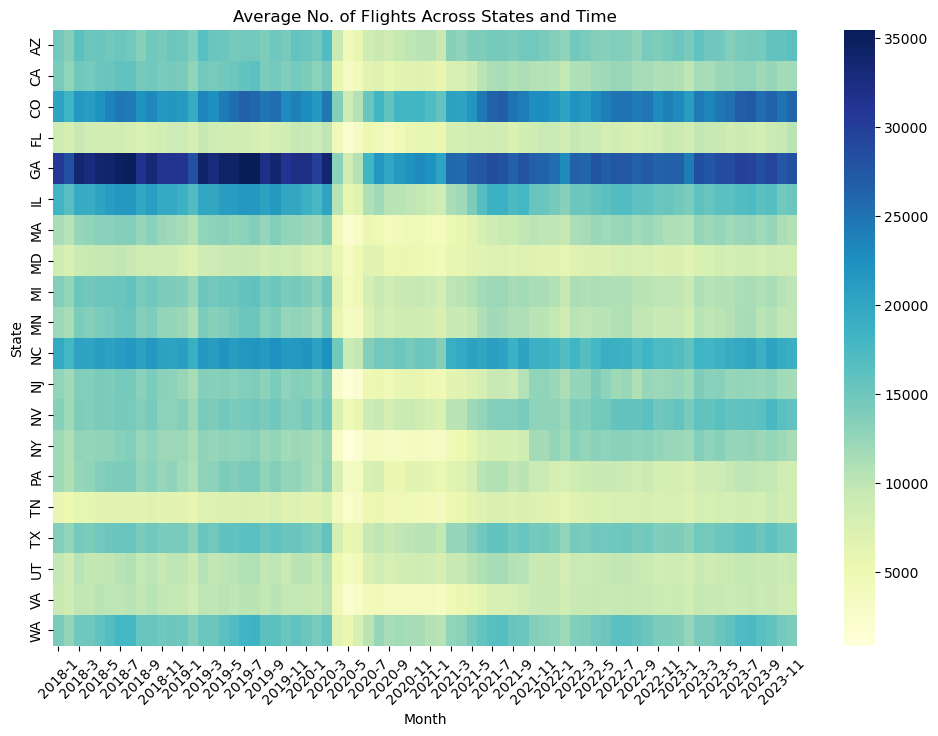

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State',
                                   columns=['Year', 'Month'],
                                   values='No. of Flights'), cmap='YlGnBu')
plt.title('Average No. of Flights Across States and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

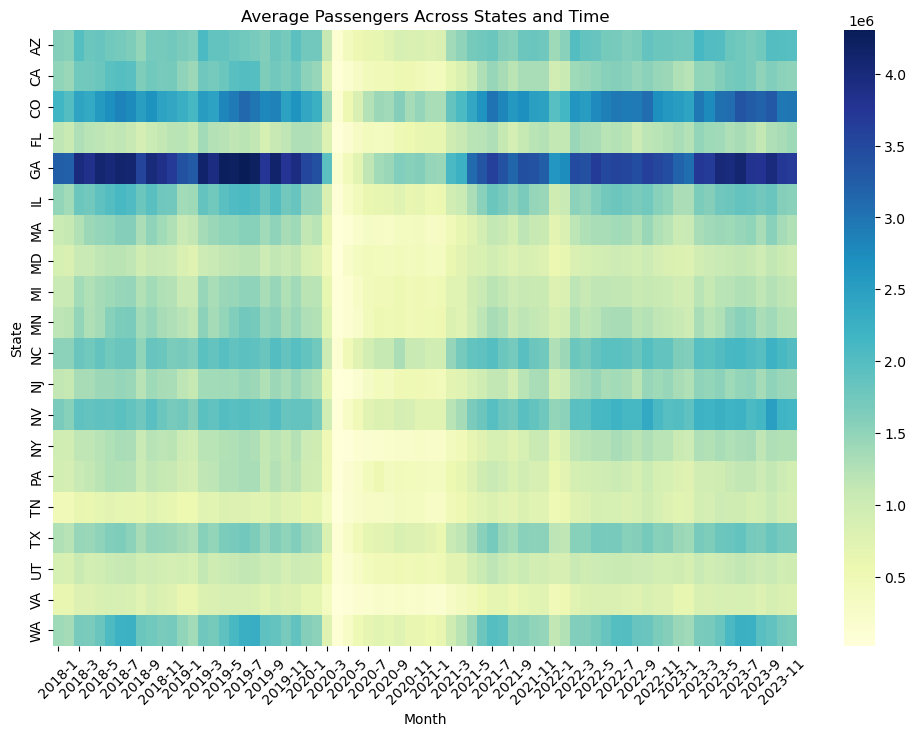

In [88]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State',
                                   columns=['Year', 'Month'],
                                   values='Passengers'), cmap='YlGnBu')
plt.title('Average Passengers Across States and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

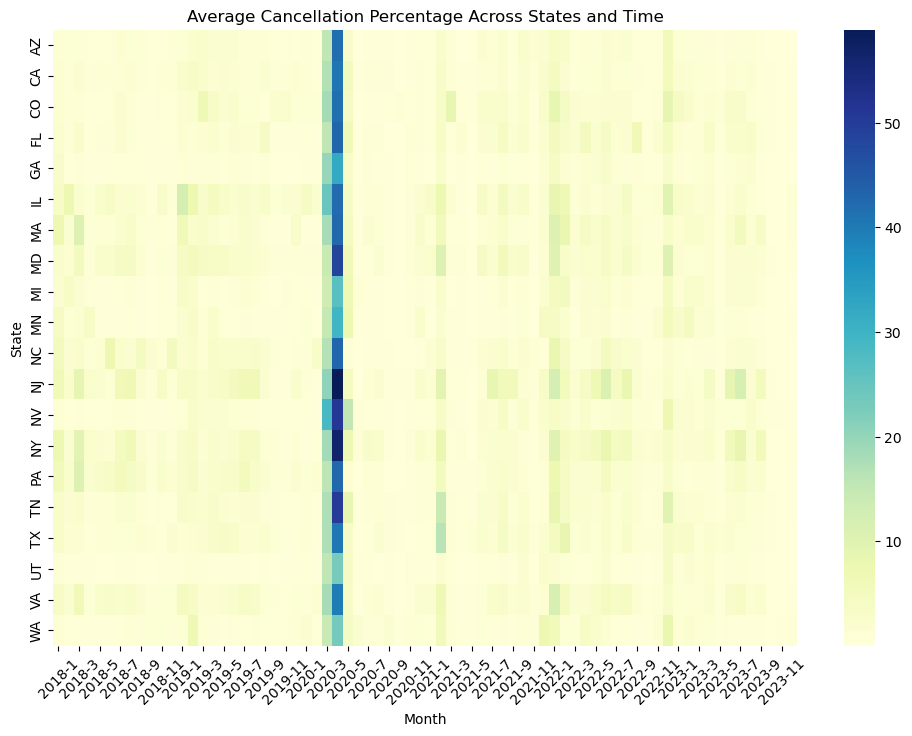

In [89]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State',
                                   columns=['Year', 'Month'],
                                   values='Cancelled %'), cmap='YlGnBu')
plt.title('Average Cancellation Percentage Across States and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

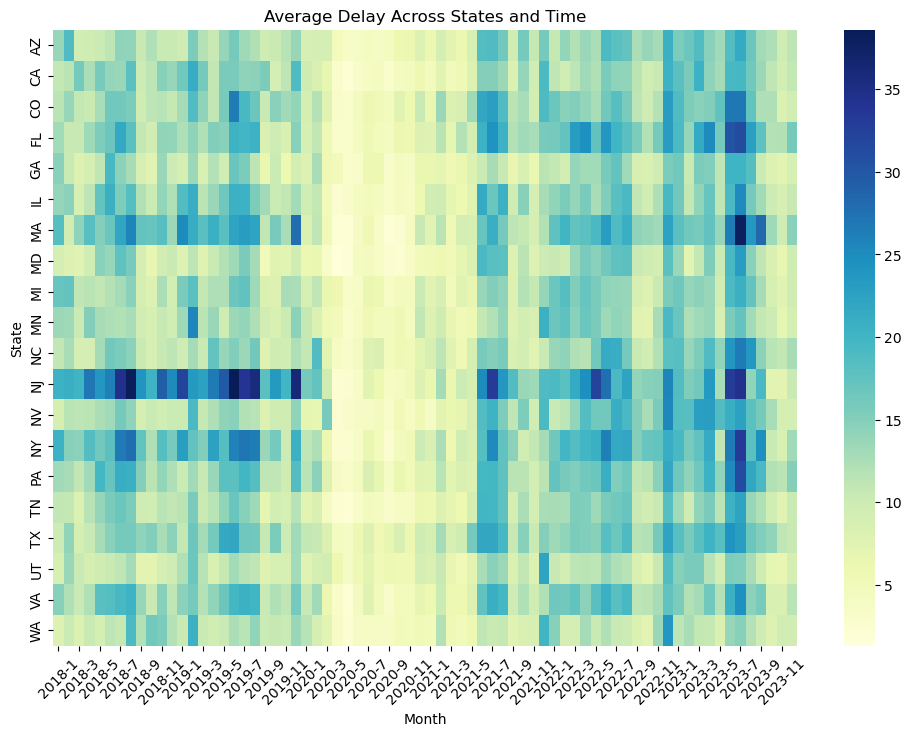

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State',
                                   columns=['Year', 'Month'],
                                   values='Average Delay (Minutes)'), cmap='YlGnBu')
plt.title('Average Delay Across States and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

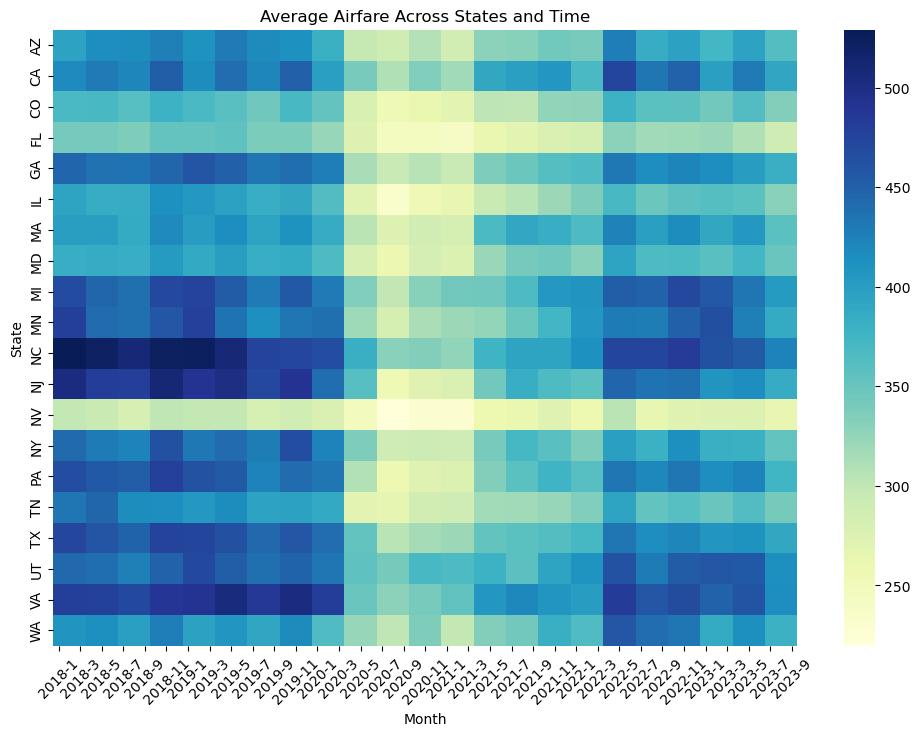

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State',
                                   columns=['Year', 'Month'],
                                   values='Inflation Adjusted Average Fare ($)'), cmap='YlGnBu')
plt.title('Average Airfare Across States and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

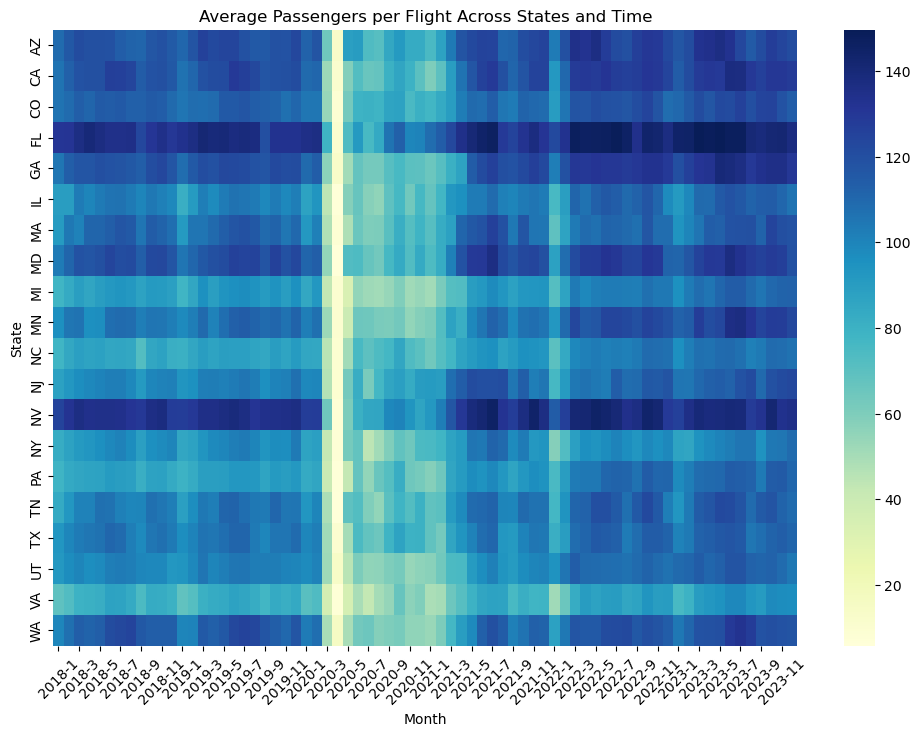

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State',
                                   columns=['Year', 'Month'],
                                   values='Passengers per Flight'), cmap='YlGnBu')
plt.title('Average Passengers per Flight Across States and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()